# Author Details:
- Name: Adam Smulczyk
- Email: adam.smulczyk@gmail.com
- Profile: [Github](https://github.com/AdamSmulczyk)
- [Github Repository](https://github.com/AdamSmulczyk/ML_Project_001)

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents ℹ️</div>

<a id="toc"></a>
- [I. PLANNING](#I)
    - [I.1 Introduction](#I.1)
    - [I.2 Dataset description](#I.2)
    - [I.3 Project assumptions](#I.3)
        - [I.3.1 Defining the problem](#I.3.1)
        - [I.3.2 Assessing the scope](#I.3.2)
        - [I.3.3 Success metric](#I.3.3)
        - [I.3.4 Feasibility  of the ML application](#I.3.4)
- [II.DATA COLLECTION AND PREPARATION](#II)
    - [II.1 Import libraries and data files](#II.1)
    - [II.2 Exploratory data analysis (EDA)](#II.2)
        - [II.2.1 Reading data & target C=class distribution](#II.2.1)
        - [II.2.2 Statistical summary](#II.2.2)
        - [II.2.3 Distribution of card1 - card6](#II.2.3)
        - [II.2.4 Distribution of frauded card4](#II.2.4)
        - [II.2.5 'DeviceType', 'DeviceInfo'](#II.2.5)
        - [II.2.6  Transaction datetime - Mean frauds by day](#II.2.6)
        - [II.2.7  Transaction amount](#II.2.7)
        - [II.2.8 'Class' distribution  – 'Normal' vs. 'Fraud'](#II.2.8)
        - [II.2.9  ProductCD](#II.2.9)
- [III DATA PRE-PROCESSING (data cleaning)](#III)           
    - [III.1 Convert types (Downcasting)](#III.1)
    - [III.2 Skewness of distributions](#III.2)
    - [III.3 Detect outlier](#III.3)
- [IV DATA PROCESSING](#IV)
    - [IV.1 Filling nulls](#IV.1)
    - [IV.2 Categorical data transformation](#IV.2)   
    - [IV.3 Normalizing](#IV.3)     
    - [IV.4 TSN](#IV.4)
    - [IV.5 PCA](#IV.5)
    - [IV.6 Imbalanced target - oversampling by SMOTEE](#IV.6)
    - [IV.7 Feature selection](#IV.7)
- [V MODEL ENGINEERING](#V)
    - [V.1 Sequencial API Model](#V.1) 
    - [V.2 Sequencial API Model](#V.2) 
    - [V.3 Classificators](#V.3)
        - [V.3.1 RandomForestClassifier](#V.3.1)
        - [V.3.2 XGBoostClassifier](#V.3.2)
        - [V.3.3 LGBMClassifier](#V.3.3)        
    - [V.4 SMOTE Classifierss](#V.4)   
        - [V.4.1 RandomForestClassifier - SMOTE](#V.4.1)
        - [V.4.2 Sequential API MODEL - SMOTE](#V.4.2)
        - [V.4.3 XGBoostClassifier - SMOTE](#V.4.3)
- [VI CONCLUSION](#VI)       

<a id="I"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700">I <span style='color:#CDA63A'>|</span>PLANNING 👨‍🏫</div>

 ### <a id="I.1"></a><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.1 Introduction</p>

Imagine standing at the check-out counter at the grocery store with a long line behind you and the cashier not-so-quietly announces that your card has been declined. In this moment, you probably aren’t thinking about the data science that determined your fate.

Embarrassed, and certain you have the funds to cover everything needed for an epic nacho party for 50 of your closest friends, you try your card again. Same result. As you step aside and allow the cashier to tend to the next customer, you receive a text message from your bank. “Press 1 if you really tried to spend $500 on cheddar cheese.”

While perhaps cumbersome (and often embarrassing) in the moment, this fraud prevention system is actually saving consumers millions of dollars per year. Researchers from the IEEE Computational Intelligence Society (IEEE-CIS) want to improve this figure, while also improving the customer experience. With higher accuracy fraud detection, you can get on with your chips without the hassle.

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry, and now you are invited to join the challenge.

You’ll benchmark machine learning models on a challenging large-scale dataset. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

If successful, you’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

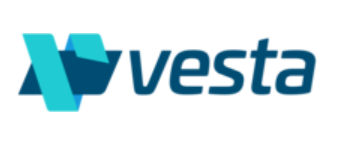

Vesta Corporation provided the dataset for this project. Vesta Corporation is the forerunner in guaranteed e-commerce payment solutions. Founded in 1995, Vesta pioneered the process of fully guaranteed card-not-present (CNP) payment transactions for the telecommunications industry. Since then, Vesta has firmly expanded data science and machine learning capabilities across the globe and solidified its position as the leader in guaranteed ecommerce payments. Today, Vesta guarantees more than $18B in transactions annually.

Citation
Addison Howard, Bernadette Bouchon-Meunier, IEEE CIS, inversion, John Lei, Lynn@Vesta, Marcus2010, and Prof. Hussein Abbass. IEEE-CIS Fraud Detection.

 ### <a id="I.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.2 Dataset description</p>

The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.

Categorical Features - Transaction
* Feature <code>ProductCD</code>
* Features <code>card1 - card6</code>
* Features <code>addr1, addr2</code>
* Feature <code>P_emaildomain</code>
* Feature <code>R_emaildomain</code>
* Features <code>M1 - M9</code>

Categorical Features - Identity
* Feature <code>DeviceType8</code>
* Feature <code>DeviceInfo</code>
* Features <code>id_12 - id_38</code>


The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

 ### <a id="I.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3 Project assumptions 🎯</p>

 ### <a id="I.3.1"></a><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.1 Defining the problem</p>

This project will be implemented based on a real dataset, provided by the project organizer. The goal is to use this dataset and machine learning to create a predictive model that predict the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

 ### <a id="I.3.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.2 Assessing the scope</p>

The entire project was done in Python, using Jupyter. Defining the scope of the project, its purpose and priorities determines the type of approach to it.
In this case, the main goal is to achieve a predictive model result that exceeds the satisfaction value achieved by the organizer. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

This dataset presents transactions that occurred in two days, where we have 20663 frauds out of 590540.
The dataset is highly unbalanced, the positive class (frauds) account for 3,499% of all transactions.

 ### <a id="I.3.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.3 Success metric</p>

Given the class imbalance ratio, we recommend measuring the accuracy using the **<mark style="background-color:#FA6775;color:white;border-radius:5px;opacity:1.0">Area Under the Precision-Recall Curve (AUPRC) - ROC (Receiver Operating Characteristics)</mark>**. Confusion matrix accuracy is not meaningful for unbalanced classification.

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

* When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
* When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
* When AUC is approximately 0, the model is predicting a negative class as a positive class and vice versa.

 ### <a id="I.3.4"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.4 Feasibility  of the ML application</p>

The feasibility of the project plan should be assessed to decide whether you are able to build a reliable predictive model with such a small sample of data. Or, can we get new data?

Feature engineering will be used for this purpose to obtain a more complete set of predictive attributes. An additional aspect that will affect the assessment of the project feasibility is the provided test data set, which will be used to verify the quality of the obtained predictive model.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="II"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700">II <span style='color:#CDA63A'>|</span>DATA COLLECTION AND PREPARATION 👨‍💻</div>

 ### <a id="II.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.1 Import libraries and data files💾</p>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import metrics
from time import time
import datetime
import warnings

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# CONFIGURATIONS
# ------------------------------------------------------
%matplotlib inline
pd.set_option('float_format', '{:.3f}'.format)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

background_color = '#f0f0f0'
background_color2 = '#FFFFFF'
sns.set_style("whitegrid", {"axes.facecolor": background_color2})

In [2]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

In [28]:
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Informatioan:
<li> The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.
</ul>
</div>

 ### <a id="II.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2 Exploratory data analysis (EDA)📊</p>

In [30]:
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


In [29]:
# Here we confirm that all of the transactions are in `train_identity`
print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

144233
141907


<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Informatioan:
<li> 24.4% of TransactionIDs in train (144233 / 590540) have an associated train_identity.
<li> 28.0% of TransactionIDs in test (144233 / 590540) have an associated train_identity.
</ul>
</div>

In [3]:
# df is created only to explore data for EDA 
df= train_transaction.copy()

In [5]:
df=train_transaction.sample(30000)

 ### <a id="II.2.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.1 Reading data & target class distribution 📚</p>

In [31]:
train_identity.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.000,70787.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000,NotFound,NaN,-480.000,New,NotFound,166.000,NaN,542.000,144.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.000,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.000,98945.000,NaN,NaN,0.000,-5.000,NaN,NaN,NaN,NaN,100.000,NotFound,49.000,-300.000,New,NotFound,166.000,NaN,621.000,500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.000,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.000,191631.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,100.000,NotFound,52.000,NaN,Found,Found,121.000,NaN,410.000,142.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [32]:
df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.000,discover,142.000,credit,315.000,87.000,19.000,NaN,NaN,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,2.000,0.000,1.000,1.000,14.000,NaN,13.000,NaN,NaN,NaN,NaN,NaN,NaN,13.000,13.000,NaN,NaN,NaN,0.000,T,T,T,M2,...,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,117.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.000,150.000,mastercard,102.000,credit,325.000,87.000,NaN,NaN,gmail.com,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,M0,...,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.000,150.000,visa,166.000,debit,330.000,87.000,287.000,NaN,outlook.com,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,315.000,NaN,NaN,NaN,315.000,T,T,T,M0,...,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

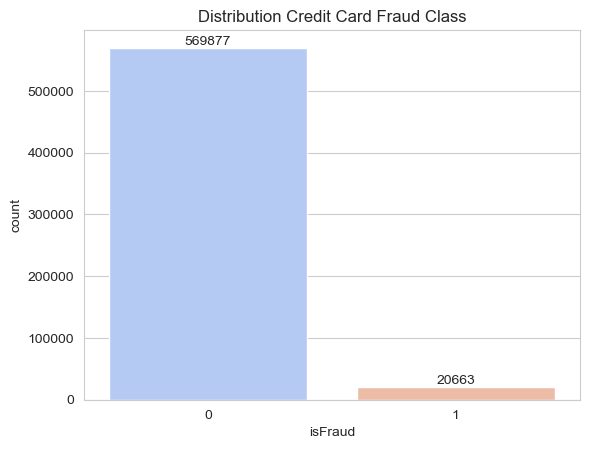

In [15]:
chart = sns.countplot(x='isFraud',
              data=train,
              palette='coolwarm')
plt.title('Distribution Credit Card Fraud Class')
chart.bar_label(chart.containers[0])
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Only 20663 (or 3.499%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.
</ul>
</div>

 ### <a id="II.2.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.2 Statistical summary 🔢</p>

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [18]:
def statistical_summary_numerical(df: pd.DataFrame):
    df = df.select_dtypes(include='number')
    desc = pd.DataFrame(index=df.columns.to_list())
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)
    desc["skew"] = df.skew()
    desc["kurtosis"] = df.kurtosis()
    desc = desc.round(2)
    return desc

statistical_summary_numerical(df)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max,skew,kurtosis
TransactionID,int64,590540,590540,100.000,0,0.000,3282269.500,170474.360,2987000.000,3134634.750,3282269.500,3429904.250,3577539.000,-0.000,-1.200
isFraud,int64,590540,2,0.000,0,0.000,0.030,0.180,0.000,0.000,0.000,0.000,1.000,5.060,23.620
TransactionDT,int64,590540,573349,97.090,0,0.000,7372311.310,4617223.650,86400.000,3027057.750,7306527.500,11246620.000,15811131.000,0.130,-1.230
TransactionAmt,float64,590540,20902,3.540,0,0.000,135.030,239.160,0.250,43.320,68.770,125.000,31937.390,14.370,1123.960
card1,int64,590540,13553,2.300,0,0.000,9898.730,4901.170,1000.000,6019.000,9678.000,14184.000,18396.000,-0.040,-1.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V335,float64,82351,672,0.110,508189,86.050,59.160,387.630,0.000,0.000,0.000,0.000,55125.000,54.140,6617.350
V336,float64,82351,356,0.060,508189,86.050,28.530,274.580,0.000,0.000,0.000,0.000,55125.000,118.720,21609.970
V337,float64,82351,254,0.040,508189,86.050,55.350,668.490,0.000,0.000,0.000,0.000,104060.000,85.770,10178.080
V338,float64,82351,380,0.060,508189,86.050,151.160,1095.030,0.000,0.000,0.000,0.000,104060.000,23.640,1433.370


In [20]:
def statistical_summary_categorical(df: pd.DataFrame):
    df = df.select_dtypes(include='object')
    desc = pd.DataFrame(index=df.columns.to_list())
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    return desc

statistical_summary_categorical(df)

,type,count,nunique,%unique,null,%null
ProductCD,object,590540,5,0.001,0,0.000
card4,object,588963,4,0.001,1577,0.267
card6,object,588969,4,0.001,1571,0.266
P_emaildomain,object,496084,59,0.010,94456,15.995
R_emaildomain,object,137291,60,0.010,453249,76.752
M1,object,319440,2,0.000,271100,45.907
M2,object,319440,2,0.000,271100,45.907
M3,object,319440,2,0.000,271100,45.907
M4,object,309096,3,0.001,281444,47.659
M5,object,240058,2,0.000,350482,59.349


In [19]:
print(f'{df.memory_usage().sum()/(1000000)} MB')

1861.382212 MB


<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Transaction Features:ProductCD,  card1 - card6,  addr1, addr2,  P_emaildomain,  R_emaildomain,  M1 - M9.    
<li> Identity Features:  DeviceType8, DeviceInfo, id_12 - id_38.    
    
<li> There is only two attributes which we can analyze 'Time' and 'Amount', because rest of them V1-V28 are generated by PCA and they look very similar.
<li> There are some missing values.
<li> Quite high memory usage data file.
</ul>
</div>

### <a id="II.2.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.3 Distribution of card1 - card6</p>

In [94]:
card_cols = [c for c in df.columns if 'card' in c]
df[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.000,discover,142.000,credit
1,2755,404.000,150.000,mastercard,102.000,credit
2,4663,490.000,150.000,visa,166.000,debit
3,18132,567.000,150.000,mastercard,117.000,debit
4,4497,514.000,150.000,mastercard,102.000,credit


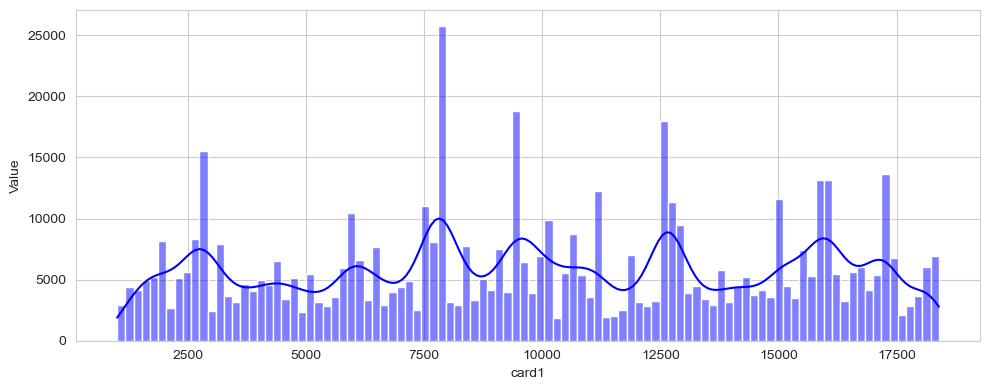

In [95]:
plt.figure(figsize=(10, 4))
p =sns.histplot(df['card1'], bins=100, kde=True,  color='blue', linewidth=1)
p.set_xlabel("card1")
p.set_ylabel("Value") 
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

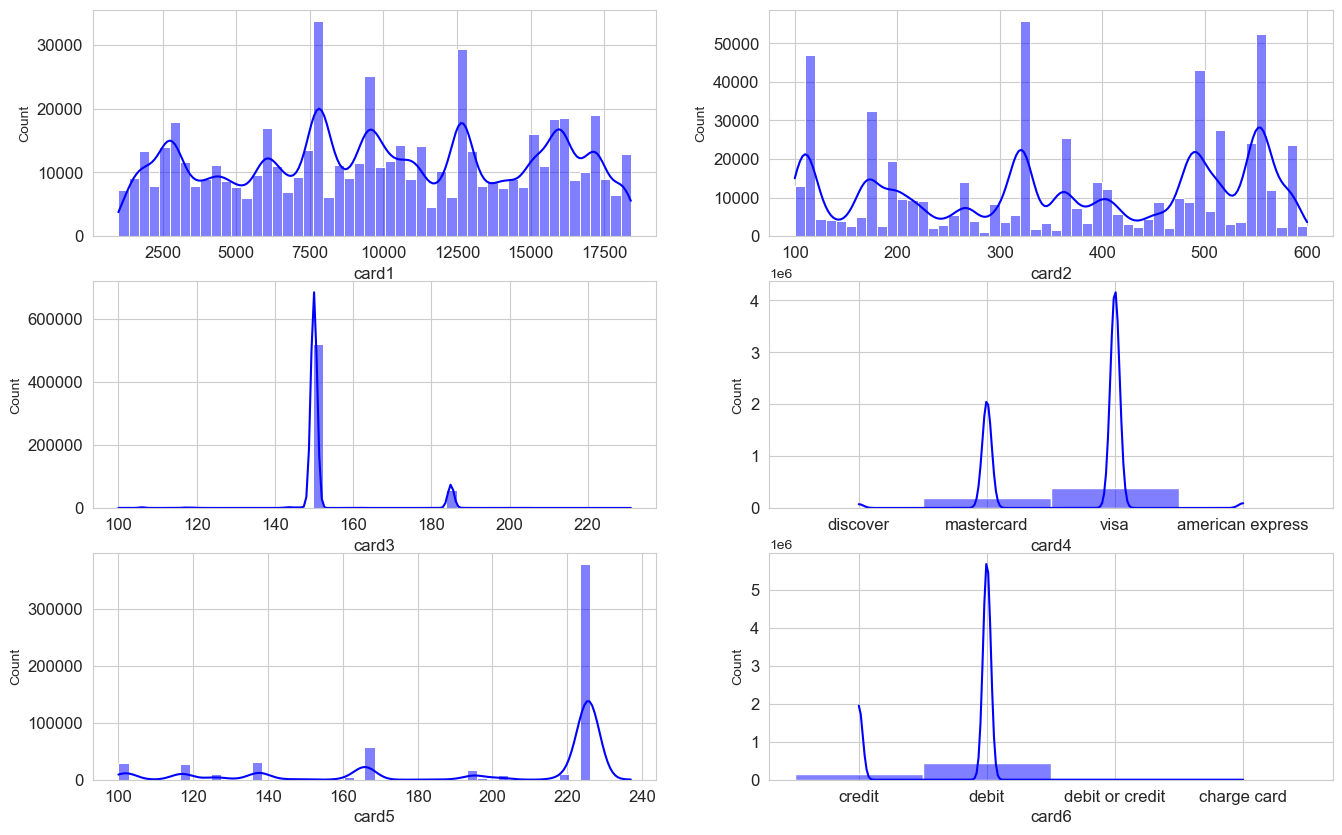

In [99]:
var = df.columns.values

i = 0
# t0 = df.loc[df['Class'] == 0]
# t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,10))

for feature in card_cols:
    i += 1
    plt.subplot(3,2,i)
    sns.histplot(df[feature],  label="isFraud = 0",  kde=True, 
                     bins=50, color='blue')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### <a id="II.2.4"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.4 Distribution of frauded card4</p>

In [106]:
df_normal = df[df['isFraud']==0]
df_fraud = df[df['isFraud']==1]

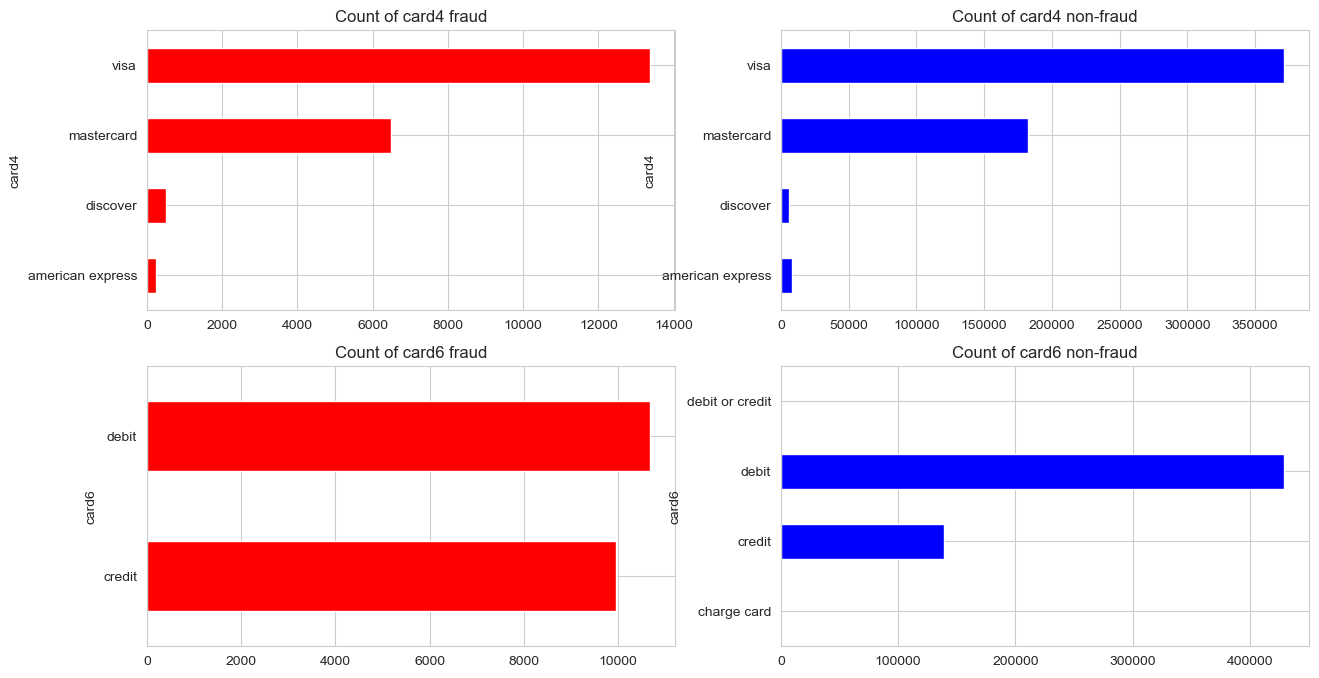

In [108]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
df_fraud.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud', color='red')
df_normal.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud', color='blue')
df_fraud.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud', color='red')
df_normal.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud', color='blue')
plt.show()

### <a id="II.2.5"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5 'DeviceType', 'DeviceInfo'</p>

In [7]:
# Add the `isFraud` column for analysis
train_identity_ = train_identity.merge(train_transaction[['TransactionID',
                                                         'TransactionDT',
                                                         'isFraud']],
                                      on=['TransactionID'])

# test_identity_ = test_identity.merge(test_transaction[['TransactionID',
#                                                       'TransactionDT']],
#                                     on=['TransactionID'])

In [56]:
train_identity_.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDT,isFraud
0,2987004,0.000,70787.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000,NotFound,NaN,-480.000,New,NotFound,166.000,NaN,542.000,144.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.000,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,86506,0
1,2987008,-5.000,98945.000,NaN,NaN,0.000,-5.000,NaN,NaN,NaN,NaN,100.000,NotFound,49.000,-300.000,New,NotFound,166.000,NaN,621.000,500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.000,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,86535,0
2,2987010,-5.000,191631.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,0.000,100.000,NotFound,52.000,NaN,Found,Found,121.000,NaN,410.000,142.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows,86549,0


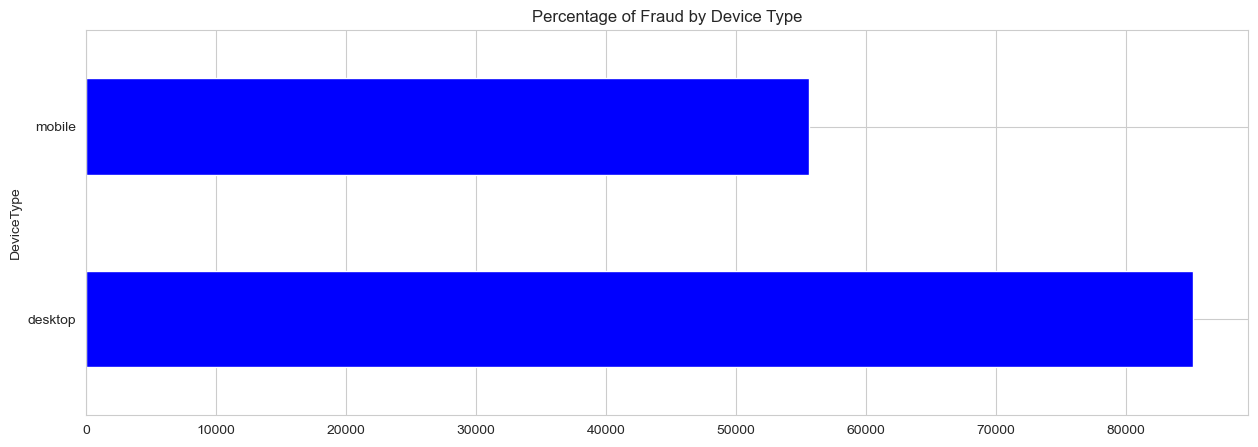

In [57]:
train_identity_.groupby('DeviceType')['isFraud'].count().plot(kind='barh',
                                                                           figsize=(15, 5),
                                                                           title='Percentage of Fraud by Device Type', 
                                                                           color='blue'
                                                                          )
plt.show()

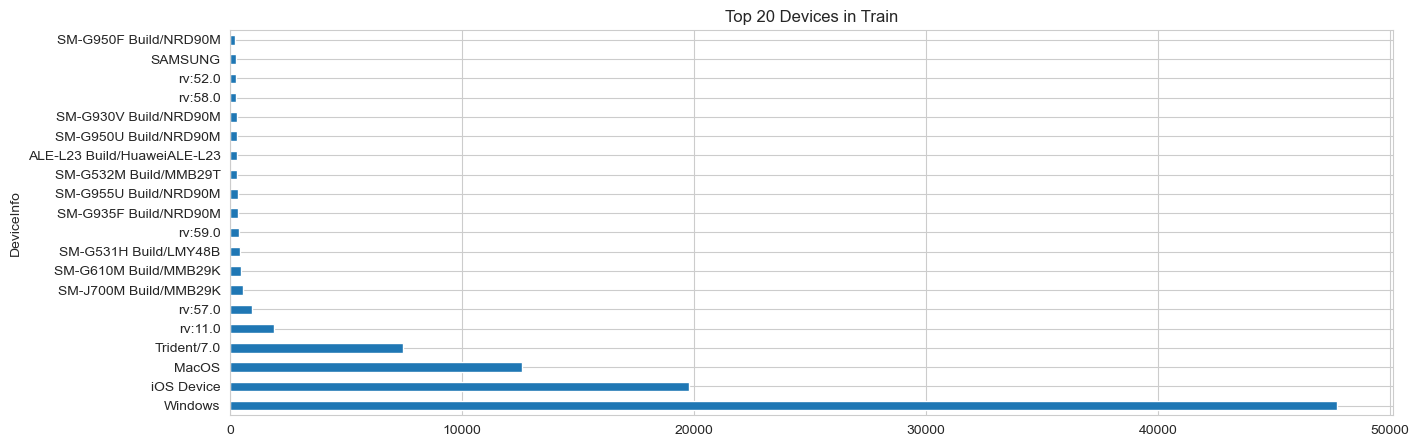

In [58]:
train_identity_.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

#### <a id="II.2.6"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.6  Transaction datetime - Mean frauds by day</p>

According to the official description 'TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).' I see people in some kernels assume that a start date is a 1 of December 2017, but to be honest the exact start date is not that important.

In [37]:
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
df['TransactionDT_2'] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

In [38]:
df['TransactionDT_2']  = pd.to_datetime(df['TransactionDT_2']).dt.date

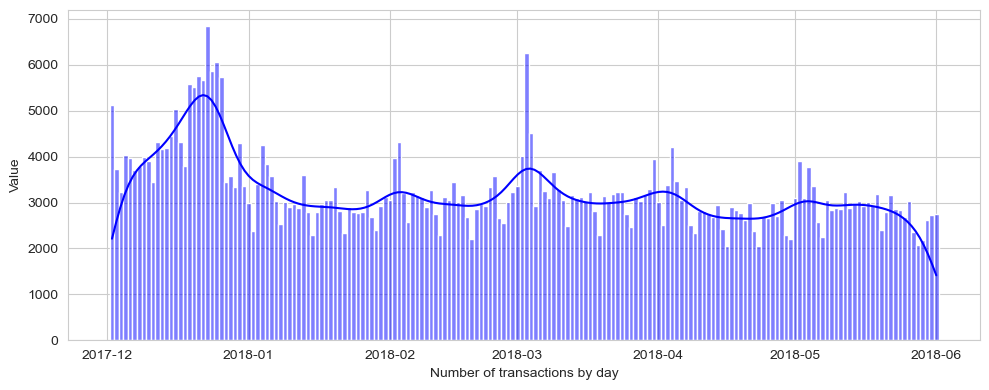

In [40]:
plt.figure(figsize=(10, 4))
p =sns.histplot(df['TransactionDT_2'], bins=100, kde=True,  color='blue', linewidth=1)
p.set_title("")
p.set_xlabel("Number of transactions by day")
p.set_ylabel("Value") 
plt.tight_layout()
plt.show()

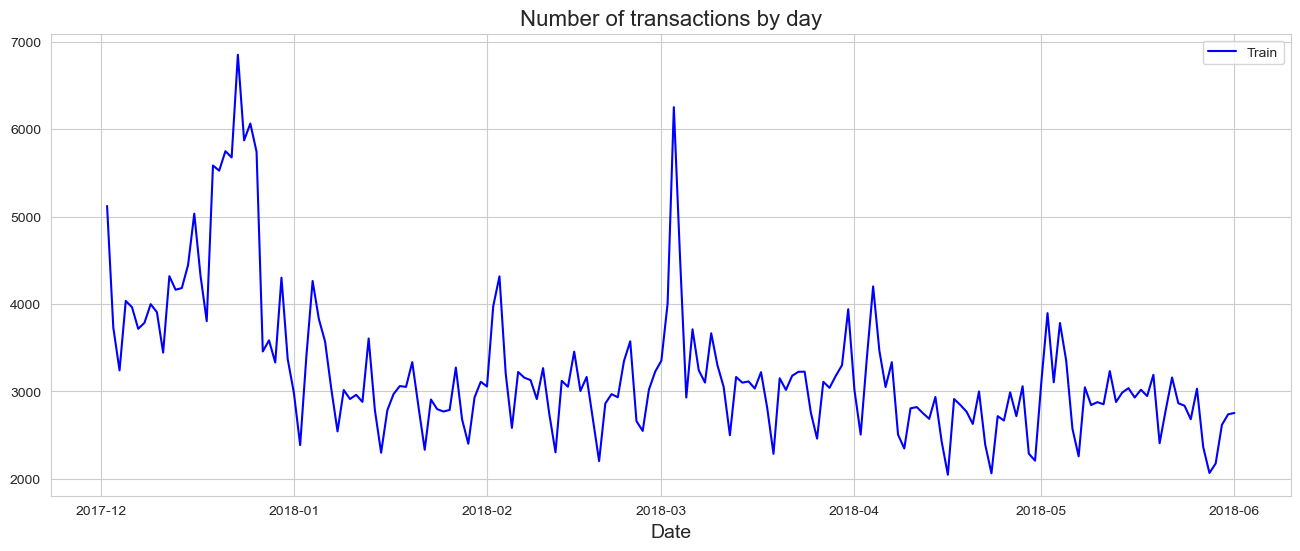

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
df['TransactionDT_2'].value_counts().sort_index().plot(ax=axes,color='blue').set_xlabel('Date', fontsize=14);
axes.set_title('Number of transactions by day', fontsize=16);
axes.legend(['Train', 'Test']);

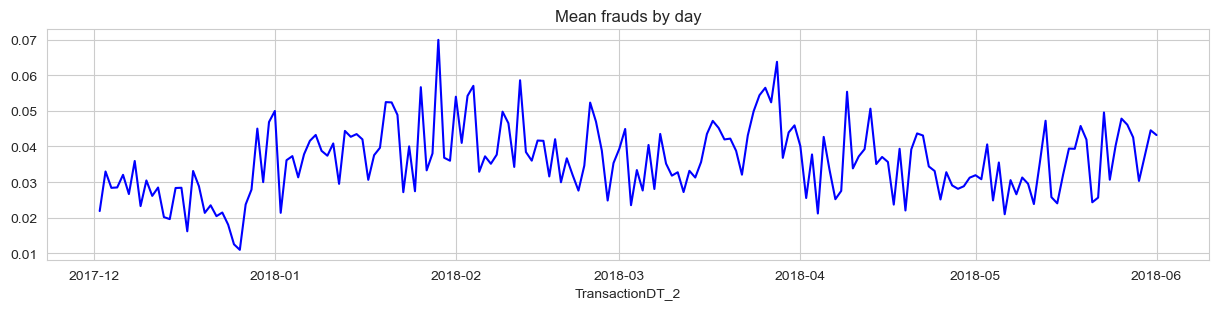

In [42]:
df.groupby('TransactionDT_2')['isFraud'].mean().plot(figsize=(15, 3),
                                                   title='Mean frauds by day', 
                                                   color='blue'
                                                   )
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp). One early discovery about the data is that the train and test appear to be split by time. There is a slight gap inbetween, but otherwise the training set is from an earlier period of time and test is from a later period of time. This will impact which cross validation techniques should be used.
</ul>
</div>

#### <a id="II.2.7"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.7  Transaction amount</p>

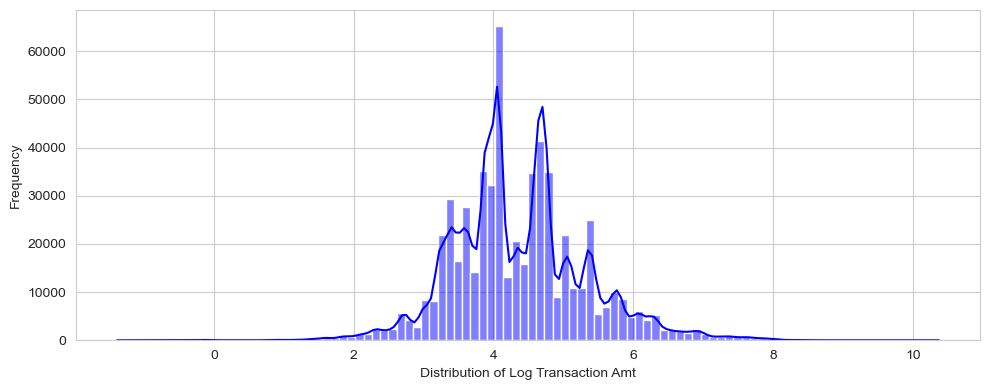

In [18]:
plt.figure(figsize=(10, 4))
p =sns.histplot(df['TransactionAmt'].apply(np.log), bins=100, kde=True,  color='blue', linewidth=1)
p.set_xlabel("Distribution of Log Transaction Amt")
p.set_ylabel("Frequency") 
plt.tight_layout()
plt.show()

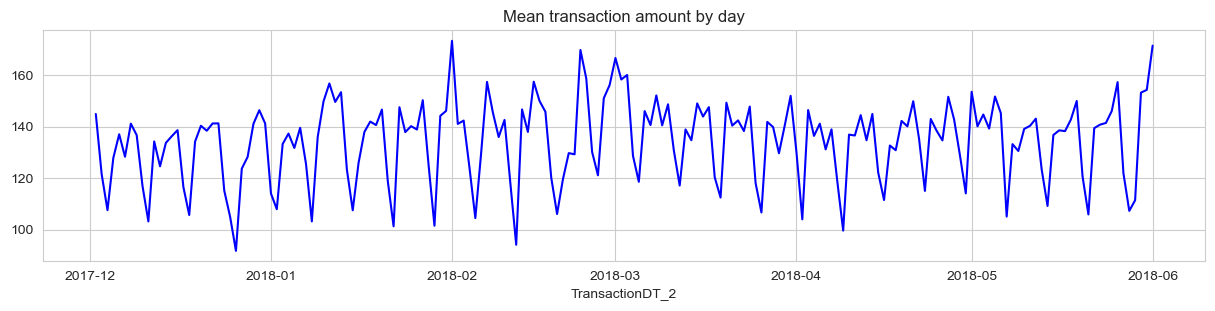

In [43]:
df.groupby('TransactionDT_2')['TransactionAmt'].mean().plot(figsize=(15, 3),
                                                          title='Mean transaction amount by day', 
                                                          color='blue'
                                                          )
plt.show()

#### <a id="II.2.8"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.8 'Class' distribution  – 'Normal' vs. 'Fraud'</p>

In [27]:
def hist_norm_fraud(normal, fraud, bins=50, title='Title', 
                    xlabel='xlabel', ylabel='ylabel'):
    plt.figure(figsize=(14, 6))
    plt.hist((normal), bins, alpha=0.6, density=True, 
             label='Normal', color='blue')
    plt.hist((fraud), bins, alpha=0.6, density=True, 
             label='Fraud', color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right', frameon=False)
    plt.show()

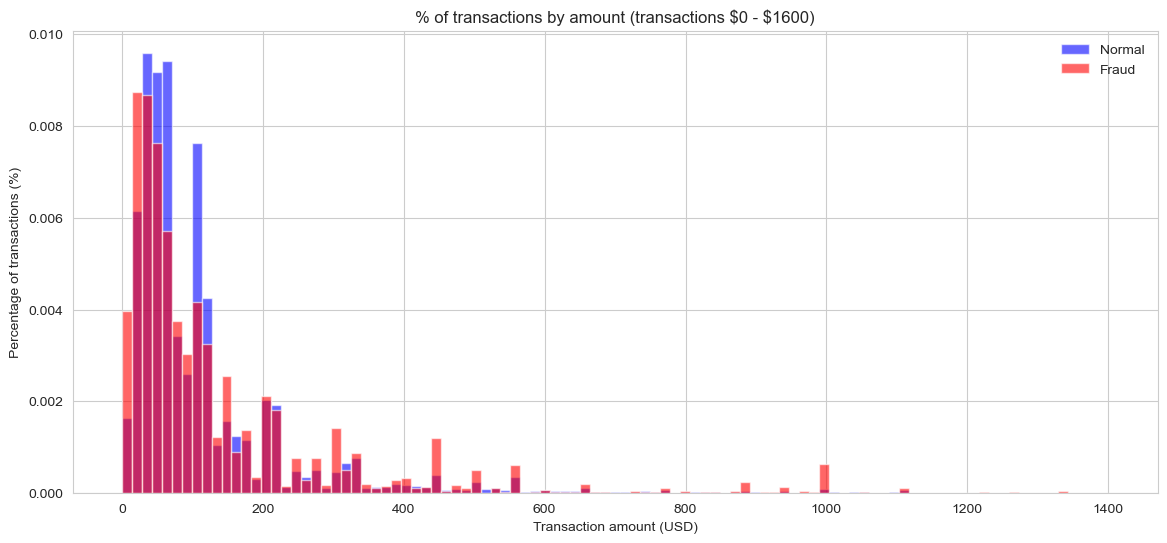

In [56]:
hist_norm_fraud(df_normal['TransactionAmt'], df_fraud['TransactionAmt'],
                bins=np.linspace(0, 1400, 100),
                title="% of transactions by amount (transactions \$0 - $1600)",
                xlabel="Transaction amount (USD)",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Most of the transactions involved small amounts.
<li> There is a decrease in transactions over time between 1 and 8 a.m. and between 12 p.m. and 3 p.m. These are probably night hours, when card transactions are performed much less frequently.
</ul>
</div>

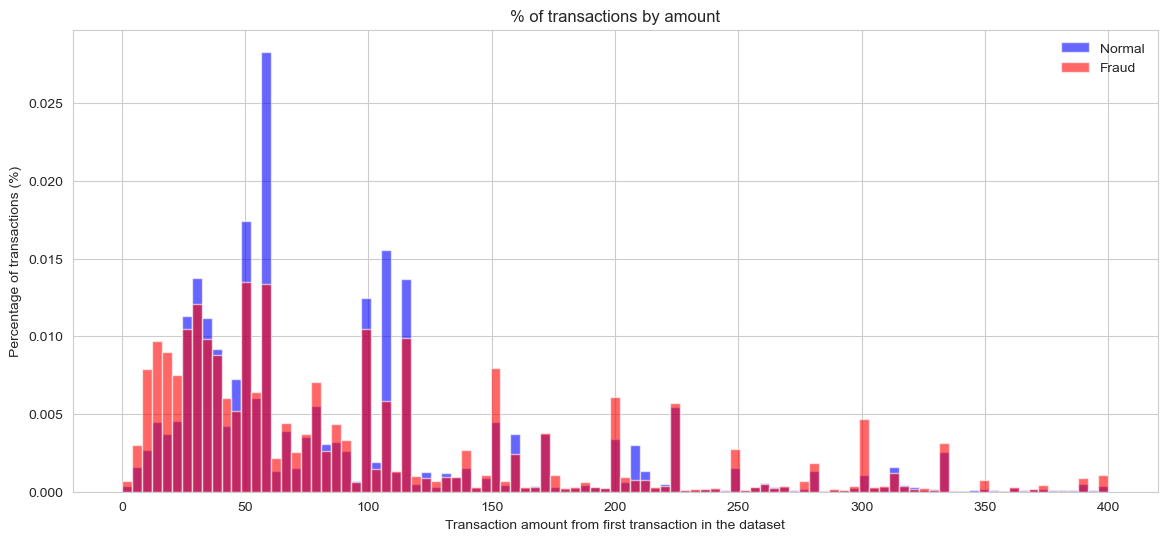

In [57]:
hist_norm_fraud(df_normal['TransactionAmt'], df_fraud['TransactionAmt'],
                 bins=np.linspace(0, 400, 100),
                title="% of transactions by amount (transactions \$0 - $400",
                xlabel="Transaction amount (USD)",
                ylabel="Percentage of transactions (%)")

In [58]:
print('Mean transaction amt for fraud is {:.4f}'.format(train_transaction.loc[train_transaction['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train_transaction.loc[train_transaction['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed by amount.
<li> Fraudulent charges appear to have a higher average transaction ammount

</ul>
</div>

#### <a id="II.2.9"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.9  'ProductCD'</p>

* For now we don't know exactly what these values represent.
* W has the most number of observations, C the least.
* ProductCD C has the most fraud with >11%
* ProductCD W has the least with ~2%

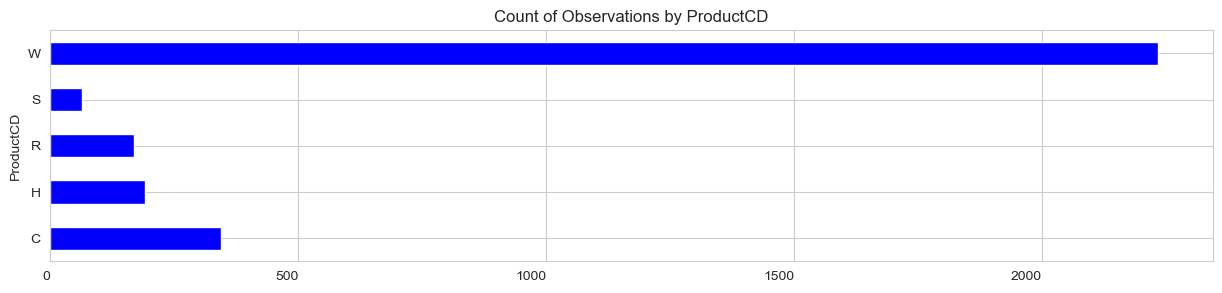

In [162]:
df.groupby('ProductCD')['TransactionID'].count().sort_index().plot(kind='barh',
                                                                    figsize=(15, 3),
                                                                    title='Count of Observations by ProductCD', 
                                                                    color='blue'
                                                                   )
plt.xticks(rotation=0, ha='right')

plt.show()

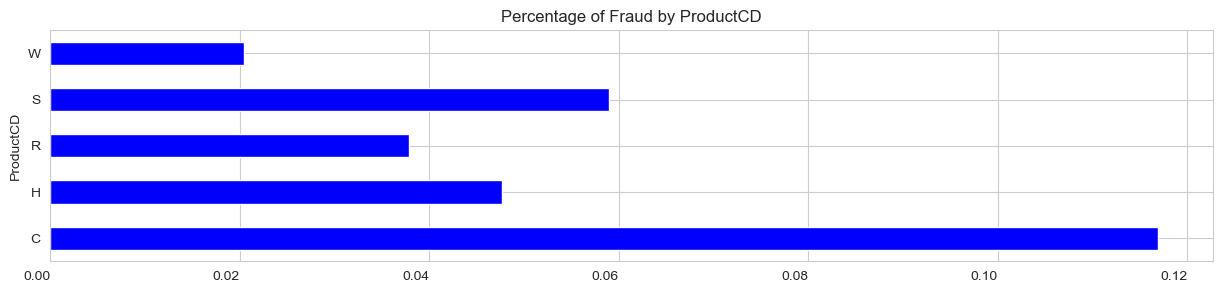

In [157]:
train_transaction.groupby('ProductCD')['isFraud'].mean().sort_index().plot(kind='barh',
                                                                           figsize=(15, 3),
                                                                           title='Percentage of Fraud by ProductCD', 
                                                                           color='blue'
                                                                           )
plt.xticks(rotation=0, ha='right')
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> In this case ProductCD = C has the highhest frauds.
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="III"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700">III <span style='color:#CDA63A'>|</span>DATA PRE-PROCESSING 🧪</div>

In [3]:
train_identity_1 =train_identity[['TransactionID','DeviceType', 'DeviceInfo']].copy()
train_transaction_identity = train_transaction.merge(train_identity_1, on=['TransactionID'], how='left')

In [4]:
X = train_transaction_identity.drop(columns=['TransactionID','isFraud']).copy()
y = train_transaction_identity['isFraud']

 ### <a id="III.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.1 Convert types (downcasting)</p>

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionDT to DeviceInfo
dtypes: float64(376), int64(2), object(16)
memory usage: 1.7+ GB


In [6]:
print(f'{X.memory_usage().sum()/(1000000)} MB')

1861.382212 MB


In [7]:
# Aggregate Categorical and Numerical
categorical = X.select_dtypes(include=['object'])
numerical_int = X.select_dtypes(include=['int64'])
numerical_float = X.select_dtypes(include=['float64'])

def convert_types (df):
    for i in categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float16') 
    return df

X = convert_types(X)

In [8]:
print(f'{X.memory_usage().sum()/(1000000)} MB')

458.937116 MB


 ### <a id="III.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.2 Skewness of distributions 📉</p>

In [11]:
def get_skewed_features(df, skewed_threshold=0.75):
    numerical_features = df.select_dtypes(include=['number']).columns
    skewed = df[numerical_features].apply(lambda x: x.skew())
    skewed = skewed.sort_values(ascending=False)
    skewed = skewed.reset_index()
    skewed.columns = ['Feature', 'Skew']
    skewed_features = list(skewed[abs(skewed['Skew']) > skewed_threshold]['Feature'])
    non_skewed_features = list(set(numerical_features)-set(skewed_features))
    return skewed_features, non_skewed_features

In [12]:
skewed_features, non_skewed_features = get_skewed_features(X)

In [13]:
from sklearn.preprocessing import StandardScaler

def transform_skewed_features(df, skewed_features):
    for col in skewed_features:
        df[col] = np.log1p(df[col])

standardScaler = StandardScaler()

def transform_non_skewed_features(df, non_skewed_features):
    for col in non_skewed_features:
        df[col] = standardScaler.fit_transform(df[[col]])

In [14]:
transform_skewed_features(X, skewed_features)

In [ ]:
transform_non_skewed_features(X, non_skewed_features)

 ### <a id="III.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.3 Detect outliers 🧐</p>

In [17]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")


calculate_outliers_percentage(X)

Percentage of outliers in TransactionDT: 0.00%
Percentage of outliers in TransactionAmt: 11.26%
Percentage of outliers in card1: 0.00%
Percentage of outliers in card2: 0.00%
Percentage of outliers in card3: 11.46%
Percentage of outliers in card5: 0.00%
Percentage of outliers in addr1: 0.06%
Percentage of outliers in addr2: 0.74%
Percentage of outliers in dist1: 6.77%
Percentage of outliers in dist2: 0.80%
Percentage of outliers in C1: 10.08%
Percentage of outliers in C2: 10.54%
Percentage of outliers in C3: 0.41%
Percentage of outliers in C4: 23.48%
Percentage of outliers in C5: 10.24%
Percentage of outliers in C6: 13.26%
Percentage of outliers in C7: 11.41%
Percentage of outliers in C8: 24.19%
Percentage of outliers in C9: 7.22%
Percentage of outliers in C10: 23.22%
Percentage of outliers in C11: 12.67%
Percentage of outliers in C12: 17.16%
Percentage of outliers in C13: 12.81%
Percentage of outliers in C14: 16.27%
Percentage of outliers in D1: 12.56%
Percentage of outliers in D2: 0.0

In [9]:
def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="IV"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700">IV <span style='color:#CDA63A'>|</span>DATA PROCESSING 🛠️</div>

In [10]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import cohen_kappa_score, accuracy_score, adjusted_mutual_info_score, mean_absolute_error, r2_score, mean_squared_error
from collections import Counter

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier

from sklearn.feature_selection import SelectFromModel, RFECV, SelectKBest, chi2, f_classif,f_regression, SelectFromModel, RFE, mutual_info_classif, SelectPercentile
from sklearn.linear_model import Lasso
from boruta import BorutaPy
from sklearn.decomposition import PCA


 ### <a id="IV.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.1 Filling nulls</p>

In [11]:
numerical_cols = X.select_dtypes(exclude=['object', 'category'])
categorical_cols = X.select_dtypes(include=['object', 'category'])

def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

X = fill_empty_categorical(X)
X = fill_empty_numerical(X)

# test = fill_empty_categorical(test)
# test = fill_empty_numerical(test)

 ### <a id="IV.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.2 Categorical data transformation</p>

In [12]:
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['category','object'] and X[cname].nunique() <6]

X = pd.get_dummies(X, columns=categorical_cols)
# test = pd.get_dummies(test, columns=categorical_cols)

In [13]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
# test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

 ### <a id="IV.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.3 Normalizing data</p>

In [70]:
# X.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 415 entries, TransactionDT to DeviceType_mobile
dtypes: bool(34), float16(366), float64(13), int32(2)
memory usage: 494.5 MB


In [15]:
X['TransactionDT'] = StandardScaler().fit_transform(X['TransactionDT'].values.reshape(-1, 1))
X['TransactionAmt'] = StandardScaler().fit_transform(X['TransactionAmt'].values.reshape(-1, 1))

In [16]:
# numerical_float = X.select_dtypes(include=['float64'])

def convert_types_2 (df): 
    for i in X.select_dtypes(include=['float64']):
         df[i] = df[i].astype('float16') 
    return df

X = convert_types_2(X)

In [17]:
X.head(3)

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,DeviceInfo,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,DeviceType_desktop,DeviceType_mobile
0,-1.578,-0.407,13926,361.000,150.000,142.000,315.000,87.000,19.000,37.000,16.000,16.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,2.000,0.000,1.000,1.000,14.000,97.000,13.000,26.000,10.000,0.000,0.000,37.875,0.667,13.000,13.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1598.000,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,False,True,True,False,True,False,False,True,True,False
1,-1.578,-0.945,2755,404.000,150.000,102.000,325.000,87.000,8.000,37.000,16.000,16.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,97.000,8.000,0.000,10.000,0.000,0.000,37.875,0.667,0.000,43.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1598.000,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,True,False,False,False,True,False,True,True,False,True,False,False,True,True,False
2,-1.578,-0.537,4663,490.000,150.000,166.000,330.000,87.000,55.500,37.000,35.000,16.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,97.000,8.000,0.000,10.000,0.000,0.000,37.875,0.667,0.000,315.000,0.000,0.000,0.000,315.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1598.000,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 415 entries, TransactionDT to DeviceType_mobile
dtypes: bool(34), float16(380), int32(1)
memory usage: 449.4 MB


In [20]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

 ### <a id="IV.4"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.4 TSN</p>

In [23]:
X = X.reset_index()

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, y, "original.png")

 ### <a id="IV.5"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.5 PCA</p>

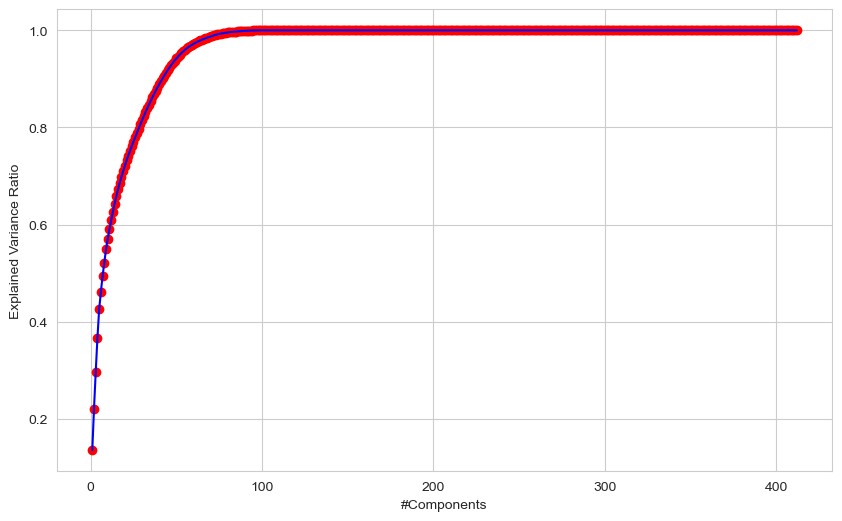

In [25]:
pca = PCA()

pca_pipe = make_pipeline(StandardScaler(), pca)

pca_pipe.fit(X)
explained_variance_ratio = np.cumsum(pca_pipe[-1].explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)+1), explained_variance_ratio, "b-")
plt.scatter(range(1, len(X.columns)+1), explained_variance_ratio, c="red")
plt.xlabel("#Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Principal Component Analysis or PCA is a linear dimensionality reduction algorithm. In this technique, data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.
<li> We can preserve 99% of variance with ~90 components if we use PCA.
</ul>
</div>

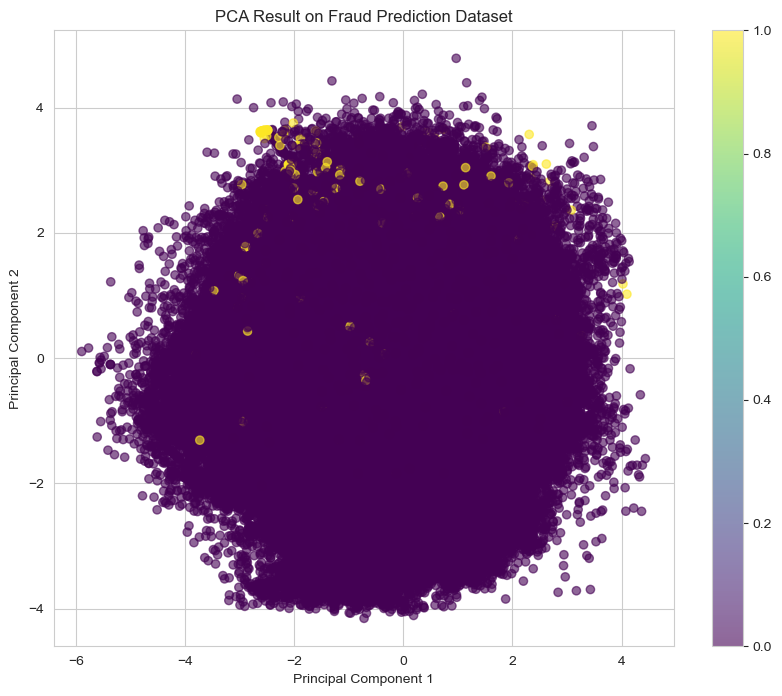

In [21]:
# Preparing the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features

# Applying PCA
pca = PCA(n_components=2)  # Reduce to two dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.reset_index(drop=True, inplace=True)  # Reset the index of pca_df

train_df_reset = train.reset_index(drop=True)  # Reset the index of train_df
pca_df['Class'] = train_df_reset['Class']  # Add the target variable for coloring

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=pca_df['Principal Component 1'], y=pca_df['Principal Component 2'],
                      c=pca_df['Class'], cmap='viridis', alpha=0.6)
plt.title('PCA Result on Fraud Prediction Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
This visualization helps in understanding the overall data structure and the interplay of features relative to flood probability, but it also highlights the need for possibly more sophisticated modeling techniques to capture the relationships effectively.
<li> The dataset shows a broad spread along both principal component axes, indicating diverse variance captured by these components.
<li> The color gradient representing FloodProbability suggests varying degrees of flood risk across different areas of the plot. However, there isn't a distinct separation or clustering based on flood probability, implying that the relationship between the observed features and flood probability may be complex and not easily separable in the first two principal components.
<li> The gradient from lighter to darker hues, as the flood probability increases, is more dispersed rather than concentrated, suggesting that higher flood probabilities might be influenced by a combination of features not easily captured by simple linear transformations like PCA.
</ul>
</div>

 ### <a id="IV.6"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.6 Imbalanced target - oversampling by SMOTE</p>

In [35]:
train_transaction.isFraud.value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [26]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [28]:
smote = SMOTE(random_state=2021)
 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

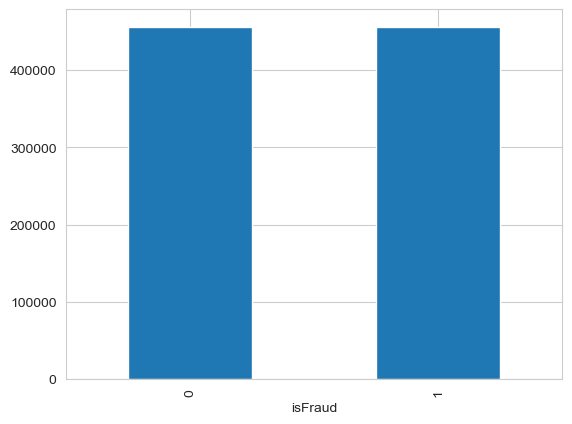

In [29]:
pd.Series(y_train_smote).value_counts().plot.bar();

In [30]:
X_train_smote.shape

(912022, 415)

In [175]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### <a id="IV.7"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.7 Feature selections</p>

In [31]:
discrete_features = X.dtypes == int


def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

mi_scores = mi_score_maker(X, y, discrete_features)
mi_scores

,Features,Scores
0,V17,0.007
1,V11,0.006
2,V10,0.006
3,V14,0.005
4,V3,0.004
5,V12,0.004
6,Amount,0.004
7,V16,0.004
8,V4,0.004
9,V7,0.004


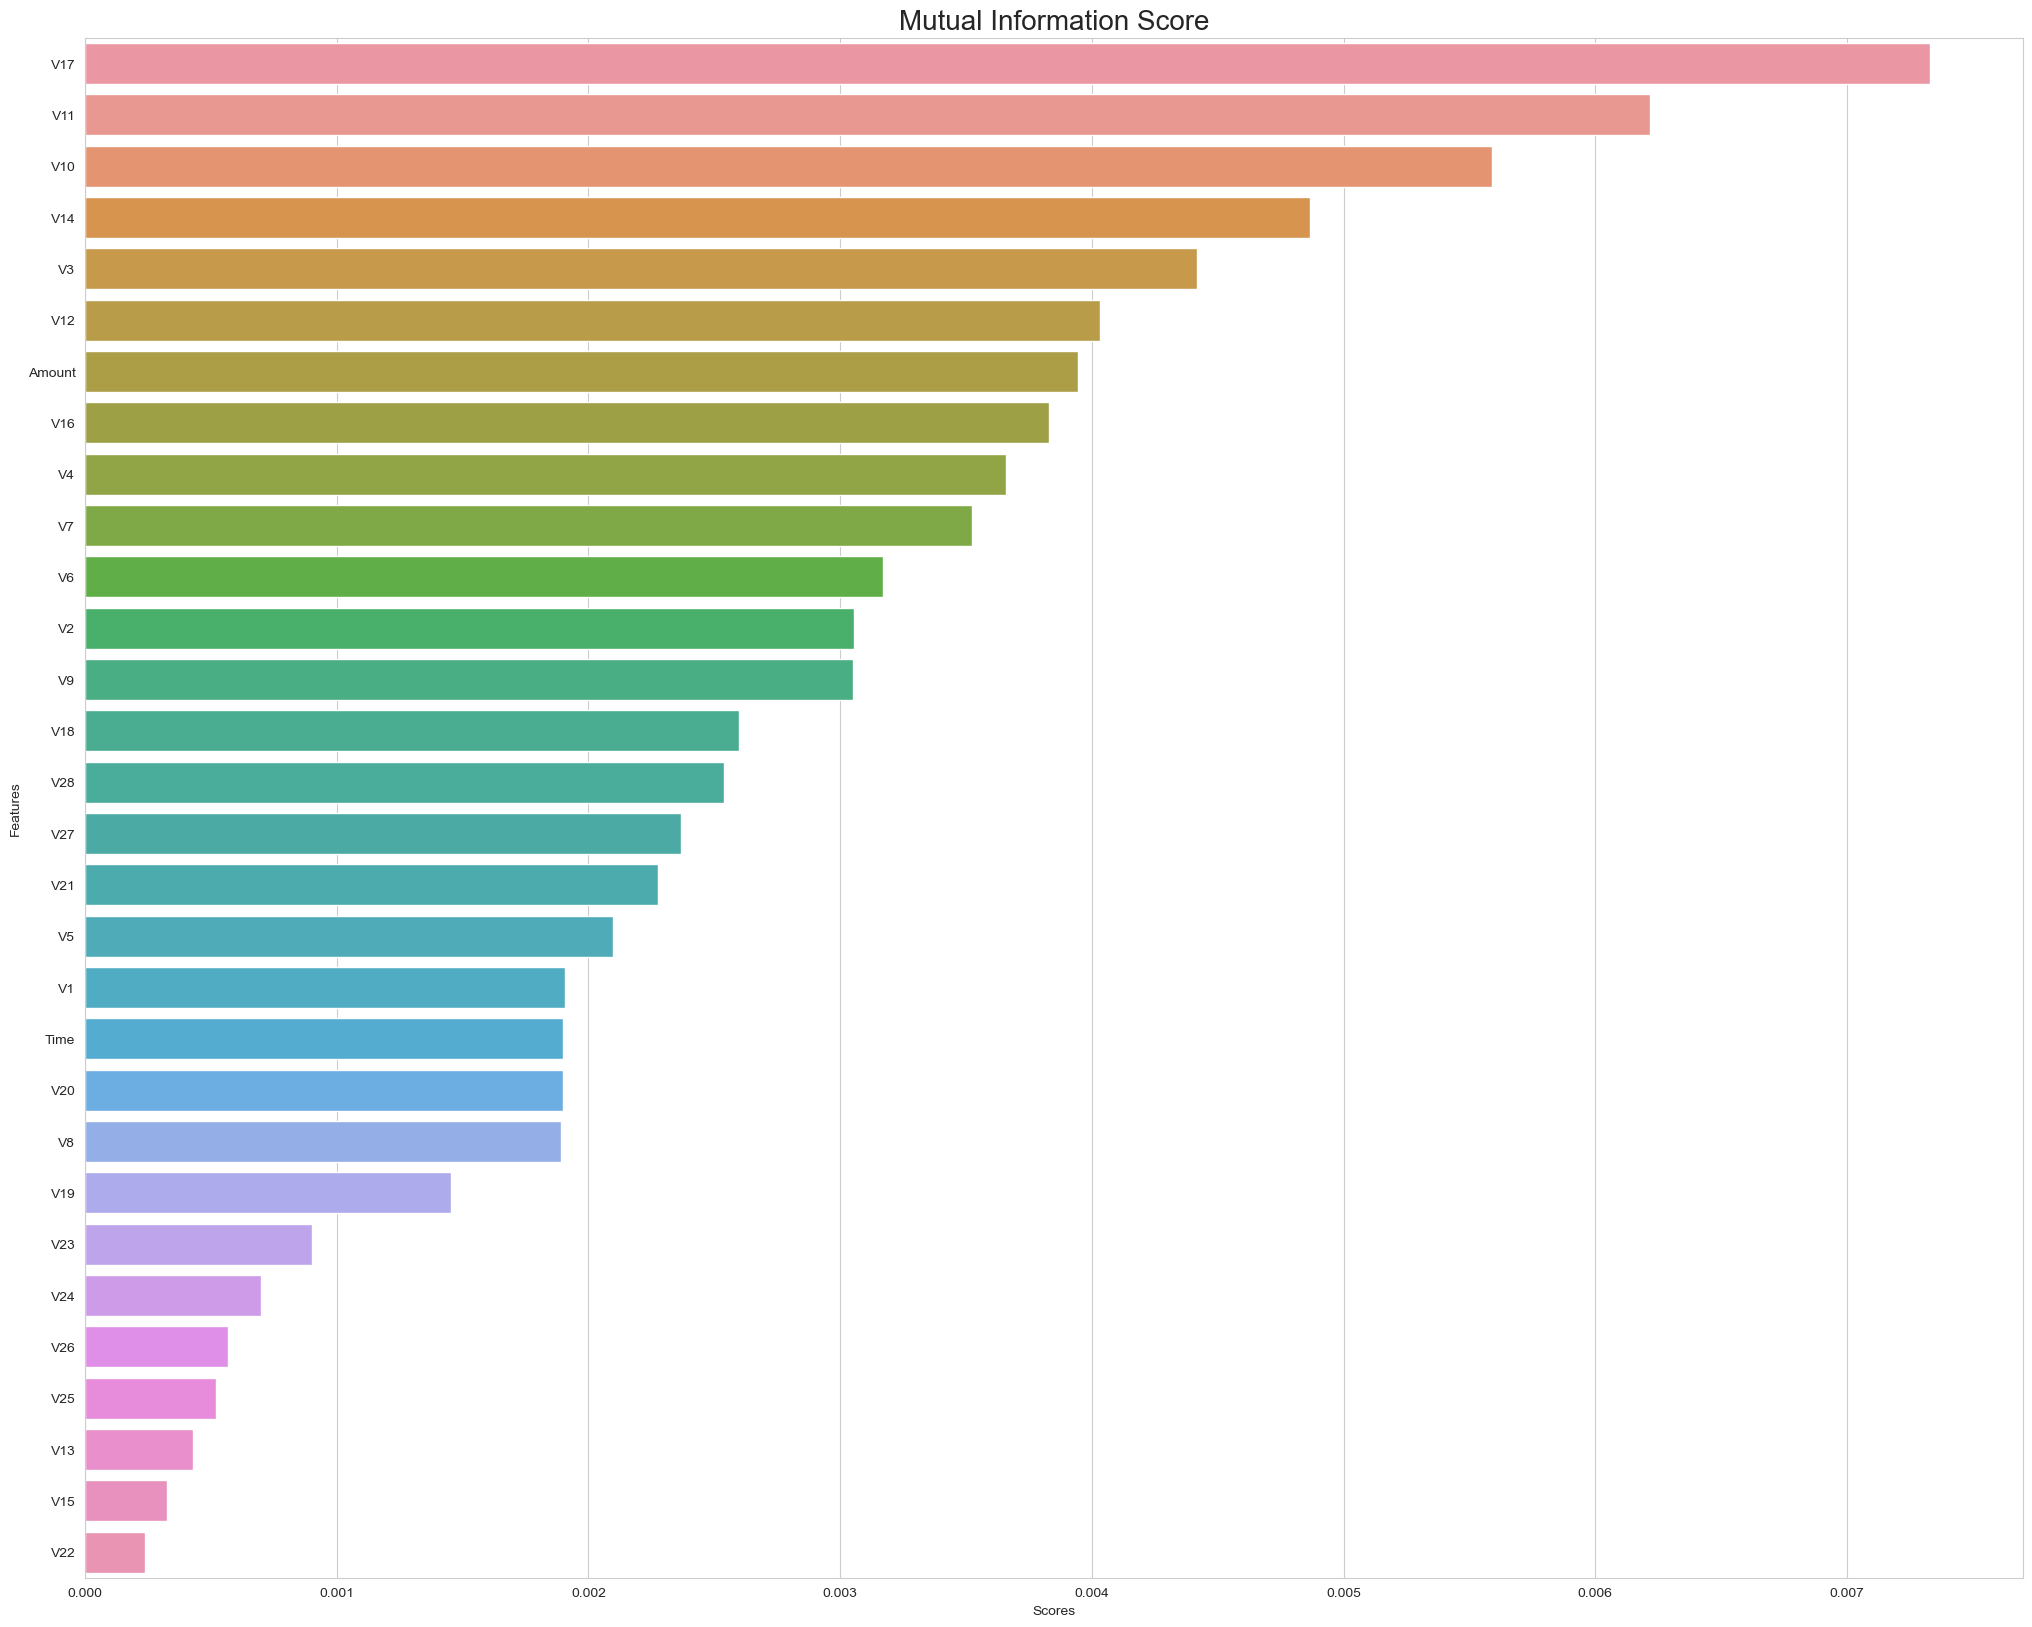

In [32]:
plt.figure(figsize=(25, 20))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Mutual Information Score helps us to understand how much the feature variables tell us about the target variable.
Since our data have a lot of feature variables, we can take help of this to remove redundant feature variables. This may improve the proformance of our model.
</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="V"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700">V <span style='color:#CDA63A'>|</span>MODEL ENGINEERING 🤖</div>

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef, average_precision_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score, accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import datasets, metrics
from yellowbrick.classifier import ROCAUC

import keras
from keras import layers
import keras_tuner

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42)

 ### <a id="V.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.1 Sequential API Model</p>

In [21]:
model_1 = tf.keras.models.Sequential([
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.3, 
                              patience=5, 
                              min_lr=1e-6)
model_check = ModelCheckpoint(filepath='tmp/autoencoder_check_point.keras', 
                              monitor='accuracy', save_best_only=True, 
                              verbose=1)

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(X, y, 
                        epochs=50, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr, model_check])

Epoch 1/50

Epoch 1: accuracy improved from -inf to 0.96896, saving model to tmp/autoencoder_check_point.keras
4614/4614 - 9s - 2ms/step - accuracy: 0.9690 - loss: 0.1148 - val_accuracy: 0.9690 - val_loss: 0.1080 - learning_rate: 0.0100
Epoch 2/50

Epoch 2: accuracy improved from 0.96896 to 0.97116, saving model to tmp/autoencoder_check_point.keras
4614/4614 - 7s - 2ms/step - accuracy: 0.9712 - loss: 0.1066 - val_accuracy: 0.9709 - val_loss: 0.1029 - learning_rate: 0.0100
Epoch 3/50

Epoch 3: accuracy improved from 0.97116 to 0.97131, saving model to tmp/autoencoder_check_point.keras
4614/4614 - 7s - 2ms/step - accuracy: 0.9713 - loss: 0.1057 - val_accuracy: 0.9711 - val_loss: 0.1056 - learning_rate: 0.0100
Epoch 4/50

Epoch 4: accuracy did not improve from 0.97131
4614/4614 - 7s - 2ms/step - accuracy: 0.9713 - loss: 0.1049 - val_accuracy: 0.9705 - val_loss: 0.1022 - learning_rate: 0.0100
Epoch 5/50

Epoch 5: accuracy improved from 0.97131 to 0.97145, saving model to tmp/autoencoder_ch

In [34]:
history_1.history['accuracy']

[0.968957245349884,
 0.9711602926254272,
 0.9713110327720642,
 0.9712703824043274,
 0.9714464545249939,
 0.9715260863304138,
 0.9715396165847778,
 0.9716733694076538,
 0.9715023636817932,
 0.9715090990066528,
 0.9714718461036682,
 0.9716869592666626,
 0.9716411828994751,
 0.9718376398086548,
 0.9716259837150574,
 0.971512496471405,
 0.9717953205108643,
 0.971632719039917,
 0.9718562960624695,
 0.9717851281166077,
 0.971734344959259]

In [35]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 415)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        26,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,229 (344.65 KB)

 Trainable params: 29,409 (114.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,820 (229.77 KB)

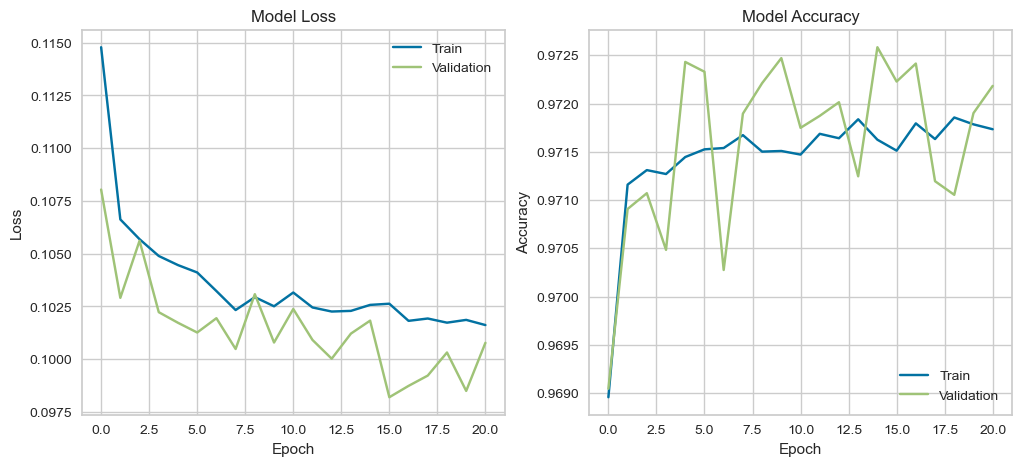

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [25]:
X_test_pred_1 = model_1.predict(X_valid)
mse_1 = np.mean(np.power(X_valid - X_test_pred_1, 2), axis=1)
df_error_1 = pd.DataFrame({'isFraud': y_valid, 'reconstruction_error': mse_1})

5537/5537 ━━━━━━━━━━━━━━━━━━━━ 3s 564us/step


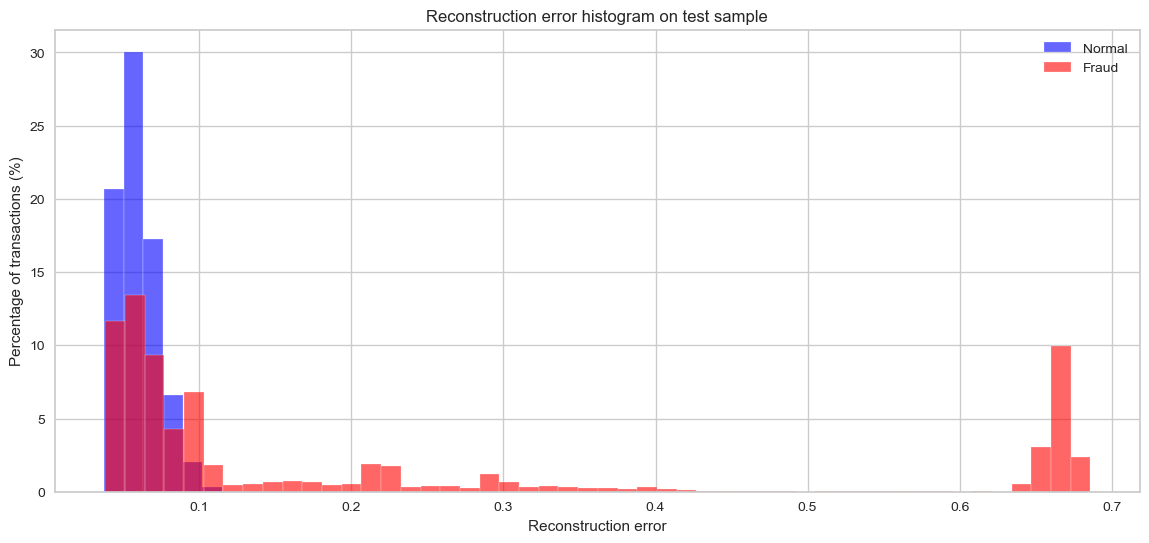

In [28]:
hist_norm_fraud(df_error_1[df_error_1['isFraud'] == 0]['reconstruction_error'], 
                df_error_1[df_error_1['isFraud'] == 1]['reconstruction_error'],
                bins=50,
                title="Reconstruction error histogram on test sample",
                xlabel="Reconstruction error",
                ylabel="Percentage of transactions (%)")

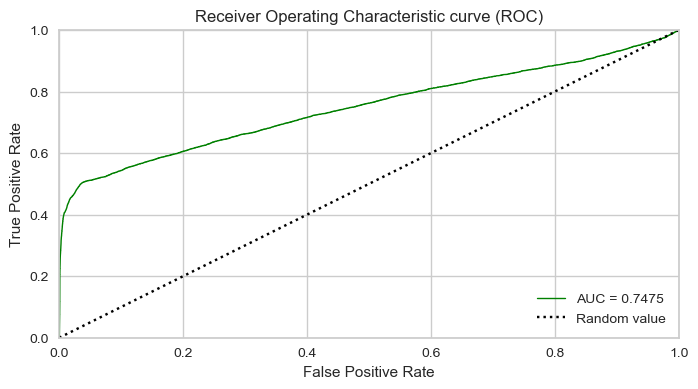

In [29]:
fpr, tpr, thresholds = roc_curve(df_error_1['isFraud'], 
                                 df_error_1['reconstruction_error'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='green', 
         label='AUC = %0.4f'% roc_auc, linewidth=1)
plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.legend(loc='lower right', frameon=False)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

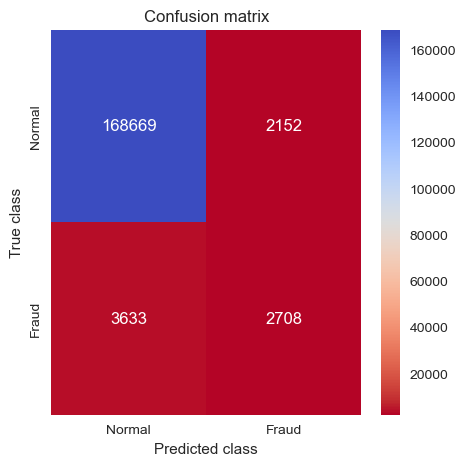

In [31]:
from sklearn.metrics import confusion_matrix
treshold=0.1
y_pred = [1 if e > treshold else
          0 for e in df_error_1['reconstruction_error'].values]
conf_matrix = confusion_matrix(df_error_1['isFraud'], y_pred)
 
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'], 
            yticklabels=['Normal','Fraud'], annot=True, 
            fmt="d", cmap='coolwarm_r');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

 ### <a id="V.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.2 Sequencial API Model</p>

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42)

In [32]:
model_2 = tf.keras.models.Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(X, y, 
                        epochs=50, 
                        verbose=2, 
                        batch_size=256,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/50
2307/2307 - 9s - 4ms/step - accuracy: 0.9688 - loss: 0.1176 - val_accuracy: 0.9724 - val_loss: 0.1021 - learning_rate: 0.0010
Epoch 2/50
2307/2307 - 7s - 3ms/step - accuracy: 0.9722 - loss: 0.1022 - val_accuracy: 0.9736 - val_loss: 0.1006 - learning_rate: 0.0010
Epoch 3/50
2307/2307 - 7s - 3ms/step - accuracy: 0.9728 - loss: 0.0989 - val_accuracy: 0.9740 - val_loss: 0.0938 - learning_rate: 0.0010
Epoch 4/50
2307/2307 - 7s - 3ms/step - accuracy: 0.9732 - loss: 0.0969 - val_accuracy: 0.9745 - val_loss: 0.0939 - learning_rate: 0.0010
Epoch 5/50
2307/2307 - 7s - 3ms/step - accuracy: 0.9737 - loss: 0.0951 - val_accuracy: 0.9746 - val_loss: 0.0916 - learning_rate: 0.0010
Epoch 6/50
2307/2307 - 7s - 3ms/step - accuracy: 0.9740 - loss: 0.0939 - val_accuracy: 0.9753 - val_loss: 0.0943 - learning_rate: 0.0010
Epoch 7/50
2307/2307 - 7s - 3ms/step - accuracy: 0.9742 - loss: 0.0926 - val_accuracy: 0.9750 - val_loss: 0.0907 - learning_rate: 0.0010
Epoch 8/50
2307/2307 - 7s - 3ms/step - ac

In [37]:
history_2.history['accuracy']

[0.9688370227813721,
 0.9722169637680054,
 0.9728435277938843,
 0.9732312560081482,
 0.9736698865890503,
 0.9739848375320435,
 0.9741660356521606,
 0.9745013117790222,
 0.9746994376182556,
 0.9747163653373718,
 0.9749788045883179,
 0.9750025272369385,
 0.975151538848877,
 0.9753767848014832,
 0.9755173325538635,
 0.9756003022193909,
 0.9757509827613831,
 0.9760168790817261,
 0.9759305119514465,
 0.9760287404060364,
 0.9760016202926636,
 0.9761252403259277,
 0.9762505292892456,
 0.9763622879981995,
 0.9764334559440613,
 0.9771565198898315,
 0.9774867296218872,
 0.9775443077087402,
 0.9776391386985779,
 0.9777203798294067,
 0.977732241153717,
 0.9779625535011292,
 0.9779286980628967,
 0.9779303669929504,
 0.9781098365783691,
 0.9779049754142761,
 0.9780370593070984,
 0.9781166315078735,
 0.9781962037086487,
 0.9781437516212463,
 0.9781877398490906,
 0.9783401489257812,
 0.978181004524231,
 0.9783198237419128]

In [38]:
history_2.history['val_accuracy']

[0.9723755717277527,
 0.9736173748970032,
 0.9740237593650818,
 0.9745205044746399,
 0.9745882153511047,
 0.9752824902534485,
 0.9749889969825745,
 0.9754405617713928,
 0.9753333330154419,
 0.9755873084068298,
 0.975914716720581,
 0.9755477905273438,
 0.9764565825462341,
 0.9754857420921326,
 0.9760050177574158,
 0.9759542346000671,
 0.9764283299446106,
 0.9764057993888855,
 0.9758921265602112,
 0.9772919416427612,
 0.9769081473350525,
 0.9769758582115173,
 0.9768178462982178,
 0.9776814579963684,
 0.9770210385322571,
 0.9783136248588562,
 0.9786692261695862,
 0.9781442880630493,
 0.9785281419754028,
 0.9789288640022278,
 0.9786579608917236,
 0.9789232611656189,
 0.9788554906845093,
 0.9788159728050232,
 0.9788329601287842,
 0.9792845249176025,
 0.979109525680542,
 0.979256272315979,
 0.9792393445968628,
 0.9793860912322998,
 0.9793127179145813,
 0.9790643453598022,
 0.9795385003089905,
 0.9792901277542114]

In [51]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 412)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       105,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448,997 (1.71 MB)

 Trainable params: 149,665 (584.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 299,332 (1.14 MB)

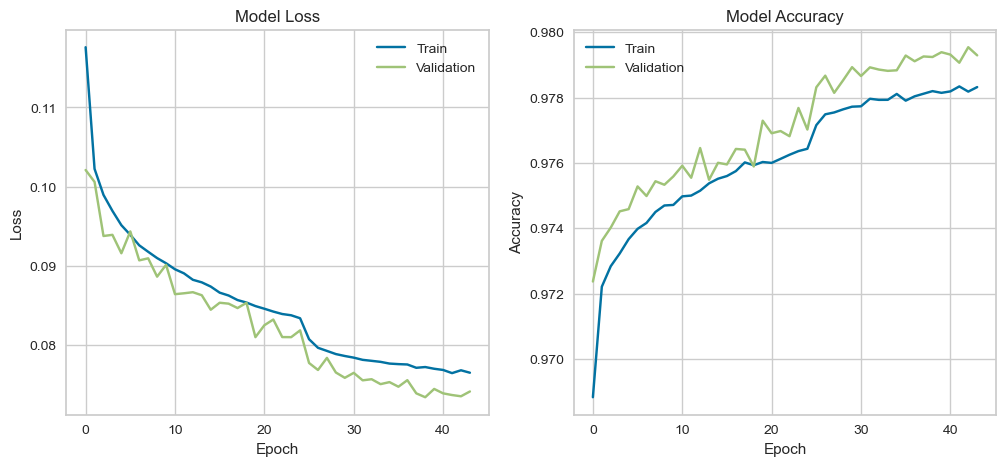

In [39]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [40]:
X_test_pred_2 = model_2.predict(X_valid)
mse_2 = np.mean(np.power(X_valid - X_test_pred_2, 2), axis=1)
df_error_2 = pd.DataFrame({'isFraud': y_valid, 'reconstruction_error': mse_2})

5537/5537 ━━━━━━━━━━━━━━━━━━━━ 4s 642us/step


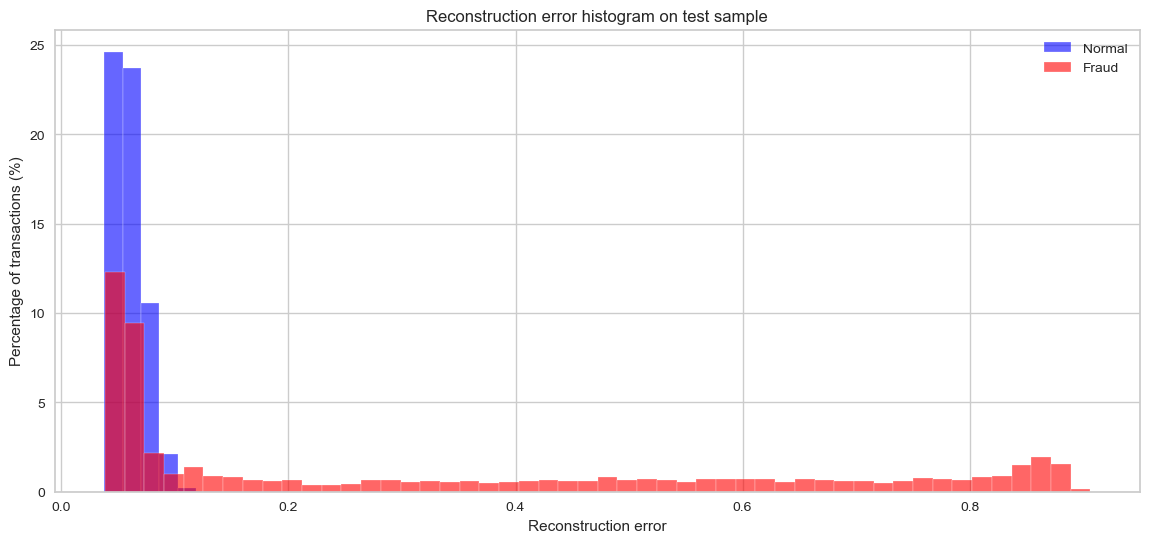

In [41]:
hist_norm_fraud(df_error_2[df_error_2['isFraud'] == 0]['reconstruction_error'], 
                df_error_2[df_error_2['isFraud'] == 1]['reconstruction_error'],
                bins=50,
                title="Reconstruction error histogram on test sample",
                xlabel="Reconstruction error",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion. 
<li> The result looks very satisfactory. Most high spread trades are actually fraudulent 
</ul>
</div>

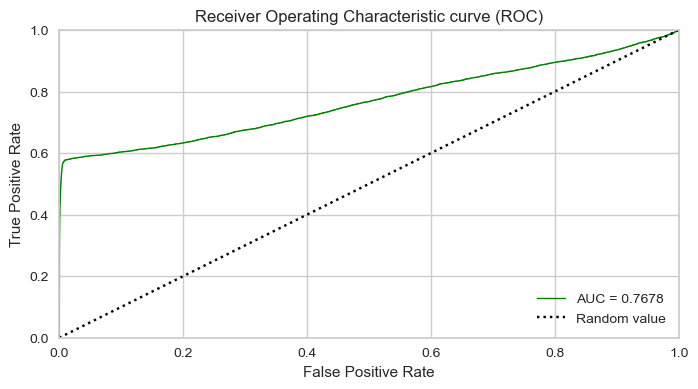

In [42]:
fpr, tpr, thresholds = roc_curve(df_error_2['isFraud'], 
                                 df_error_2['reconstruction_error'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='green', 
         label='AUC = %0.4f'% roc_auc, linewidth=1)
plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.legend(loc='lower right', frameon=False)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [43]:
roc_auc_score(y_valid, X_test_pred_2)

0.9399912882667825

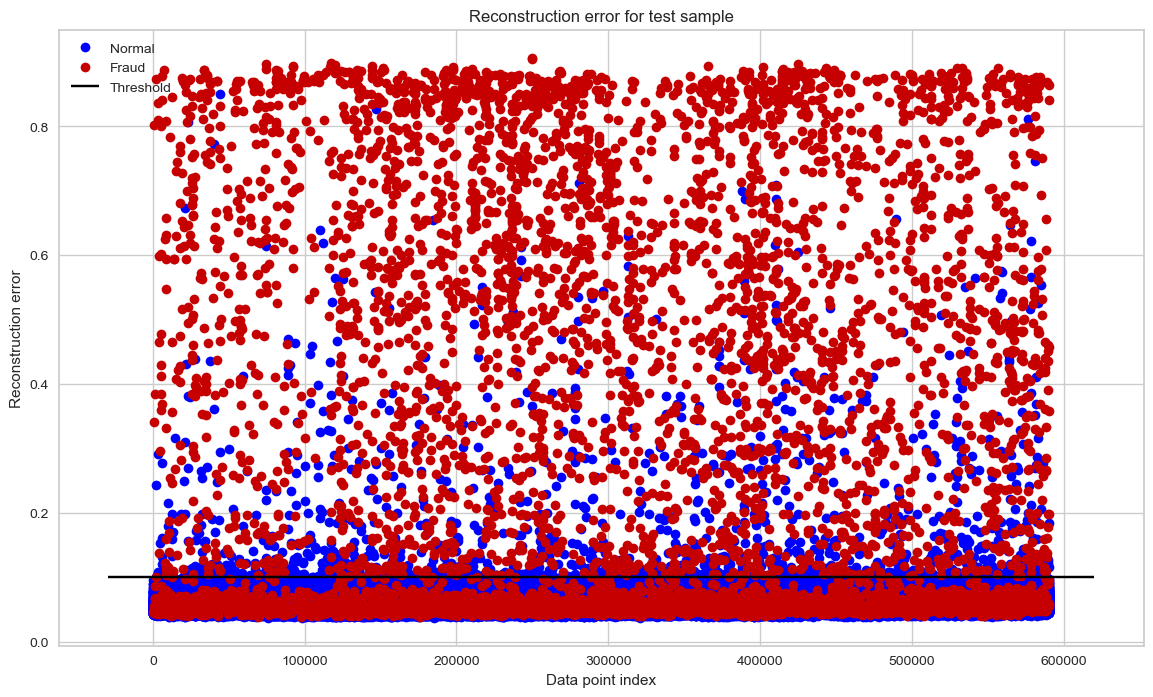

In [44]:
treshold=0.1
fig, ax = plt.subplots(figsize=(14, 8))
 
ax.plot(df_error_2[df_error_2['isFraud'] == 0].index, 
        df_error_2[df_error_2['isFraud'] == 0]['reconstruction_error'], 
        marker='o', linestyle='', color=("blue"),
        label= 'Normal')
ax.plot(df_error_2[df_error_2['isFraud'] == 1].index, 
        df_error_2[df_error_2['isFraud'] == 1]['reconstruction_error'], 
        marker='o', linestyle='', color=(198/255, 0.0, 0.0),
        label= 'Fraud')
ax.hlines(treshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="black", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for test sample")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Assumption: based on the assumed cost of a suspicious transaction and the possibility of contact with customers - we will  truncate for reconstruction errors greater than 3.

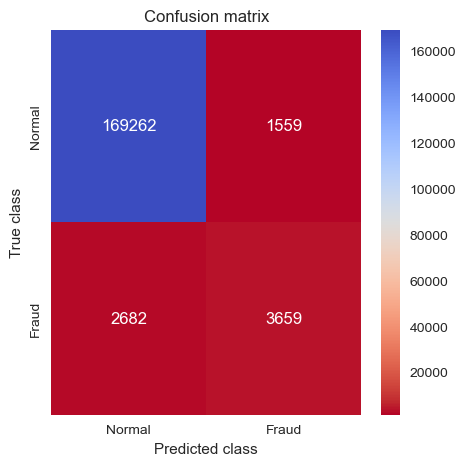

In [45]:
from sklearn.metrics import confusion_matrix
treshold=0.1
y_pred = [1 if e > treshold else
          0 for e in df_error_2['reconstruction_error'].values]
conf_matrix = confusion_matrix(df_error_2['isFraud'], y_pred)
 
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'], 
            yticklabels=['Normal','Fraud'], annot=True, 
            fmt="d", cmap='coolwarm_r');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

 ### <a id="V.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3 Classificators</p>

StratifiedKFold

Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.

In [23]:
print(f'train_normal shape: {train_normal.shape};')
print(f'train_fraud shape: {train_fraud.shape};')
print(f'X shape: {X.shape};')
print(f'X_train shape: {X_train.shape};')
print(f'X_valid shape: {X_valid.shape}; y_valid shape: {y_valid.shape}')

NameError: name 'train_normal' is not defined

In [24]:
def model_train(model,model_name):
#     model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_valid, y_valid)
    prediction = model.predict(X_valid)
    print(f"\
{model_name} - Train Score = {model_train_score *100}%\n\
{model_name} - Valid Score = {model_test_score*100}%\n\
{model_name} - Mean Squared Error = {mean_squared_error(y_valid, prediction)}\n\
{model_name} - Mean Absolute Error = {mean_absolute_error(y_valid, prediction)}")
    

def kfold_accuracy_RSKFold(model): 
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovo')
    print("score by 'AUC': %.2f (%.2f)"% (np.mean(n_scores), np.std(n_scores)))


def kfold_accuracy(model): 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print("score by 'accuracy' = %.3f (%.3f)"% (np.mean(n_scores), np.std(n_scores)))
    
def kfold_AUC(model):  
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovo')
    print("score by 'AUC': %.2f (%.2f)"% (np.mean(n_scores), np.std(n_scores)))

In [29]:
# Cross-validation is a statistical method used to estimate the skill of machine learning models.

In [55]:
def create_measures(y,y_pred):
    # minimalna wartość dla cut offa dla takiej samej ilości badów jak występuje w próbce
    cut_off = np.sort(y_pred)[-y.sum():].min()
#     cut_off = 0.263
    y_pred_class = np.array([0 if x < cut_off else 1 for x in y_pred])
     
    d = {'f1_score': [round(f1_score(y, y_pred_class),4)],
         'P-R score': [round(average_precision_score(y, y_pred_class),4)],
         'matthews': [round(matthews_corrcoef(y, y_pred_class),4)],
         'accuracy': [round(accuracy_score(y, y_pred_class),4)],
         'recall': [round(recall_score(y, y_pred_class),4)],
         'precision': [round(precision_score(y, y_pred_class),4)],
         'min cut_off': cut_off,
        }
     
    return pd.DataFrame.from_dict(d)
  
def calculating_metrics(X_train, X_valid, y_train, y_valid, model):
    train = create_measures(y_train, model.predict_proba(X_train)[:, 1])
    valid = create_measures(y_valid, model.predict_proba(X_valid)[:, 1])
      
    return pd.concat([train,valid]).set_index([pd.Index(['TRAIN', 'VALID'])]) 

 ### <a id="V.3.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.1 RandomForestClassifier</p>

In [26]:
model_31 = RandomForestClassifier(n_jobs=1, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=42,
                             verbose=False)

In [27]:
model_31.fit(X_train,y_train)

RandomForestClassifier(n_estimators=42, n_jobs=1, random_state=42,
                       verbose=False)

In [34]:
model_train(model_31, 'RandomForestClassifier')

RandomForestClassifier - Train Score = 99.96613269211231%
RandomForestClassifier - Valid Score = 97.88555107754485%
RandomForestClassifier - Mean Squared Error = 0.02114448922455154
RandomForestClassifier - Mean Absolute Error = 0.02114448922455154


In [28]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_31)

,f1_score,P-R score,matthews,accuracy,recall,precision,min cut_off
TRAIN,1.000,0.999,1.000,1.000,1.000,0.999,0.429
VALID,0.665,0.454,0.653,0.976,0.674,0.657,0.214


In [112]:
kfold_AUC(model_31)

score by 'AUC': 0.92 (0.00)


In [109]:
print(classification_report(y_valid,y_pred_31))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113866
           1       0.94      0.44      0.60      4242

    accuracy                           0.98    118108
   macro avg       0.96      0.72      0.79    118108
weighted avg       0.98      0.98      0.98    118108



In [29]:
y_proba = model_31.predict_proba(X_valid)[:,1]

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_valid, y_proba)
roc_auc

0.9230442785832838

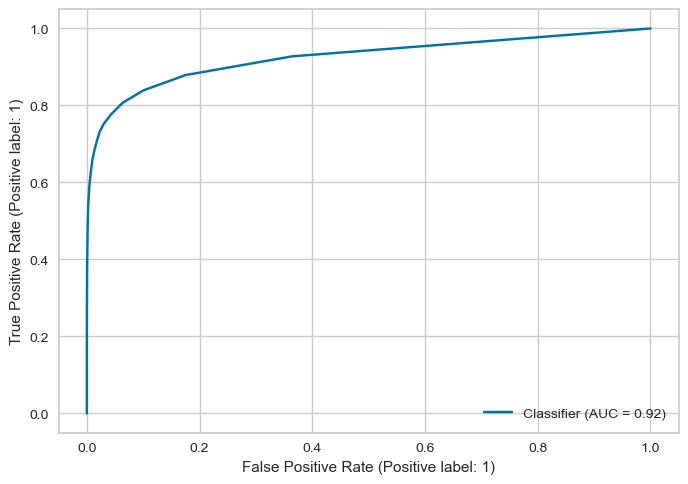

In [161]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_valid, y_proba)

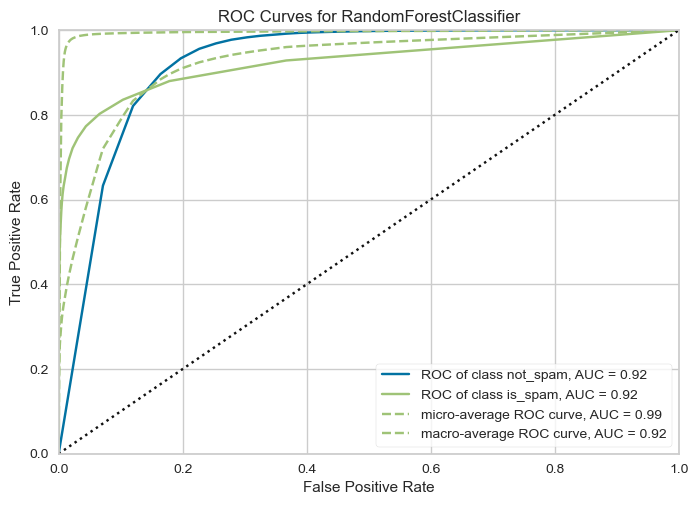

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
visualizer_31 = ROCAUC(model_31, classes=["not_spam", "is_spam"])
visualizer_31.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_31.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_31.show()     

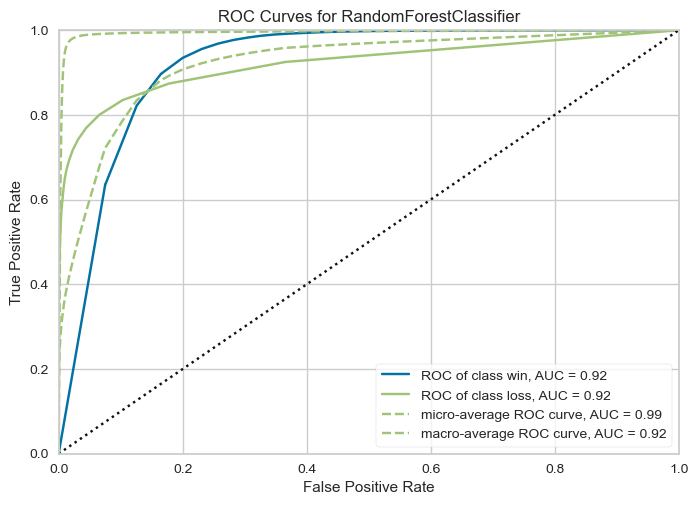

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
visualizer = ROCAUC(model_31, classes=["win", "loss", "draw"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer.show()  


In [31]:
threshold = 0.2 
# threshold  = 0.5  default
y_pred_d = (model_31.predict(X_valid)> threshold).astype('float')
confusion_matrix(y_valid, y_pred_d)

# is not working - result same like default value for threshold = 0.5

array([[170621,    200],
       [  3534,   2807]], dtype=int64)

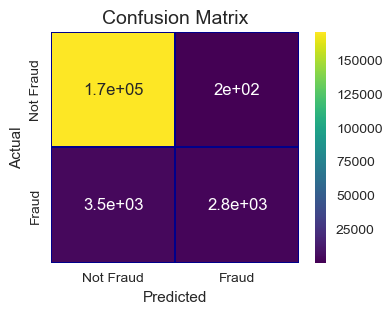

In [32]:
y_pred_31 = model_31.predict(X_valid) #-predict but not proba than because of that  default value for threshold = 0.5
cm_31 = pd.crosstab(y_valid, y_pred_31, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,3))
sns.heatmap(cm_31, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="viridis")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion. 
<li> The score AUC for this model vith default threshold = 0.5 is very well AUC =  92%. 
<li> Scores for confusion matrix:  
    <li>    [TP=170637, FN=200],
    <li>    [FP=3562,   TN=2779]
<li> Let's do some checks for different threshold values.
</ul>
</div>

In [39]:
threshold = 0.2
y_pred_a = (model_31.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_a)

array([[168582,   2239],
       [  2064,   4277]], dtype=int64)

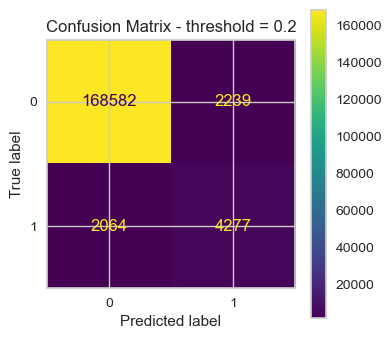

In [70]:
confusion_mat_31_a = confusion_matrix(y_valid, y_pred_a)
disp = ConfusionMatrixDisplay(confusion_mat_31_a)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - threshold = 0.2")
plt.show()

In [60]:
threshold = 0.4
y_pred_b = (model_31.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_b)

array([[170382,    439],
       [  3025,   3316]], dtype=int64)

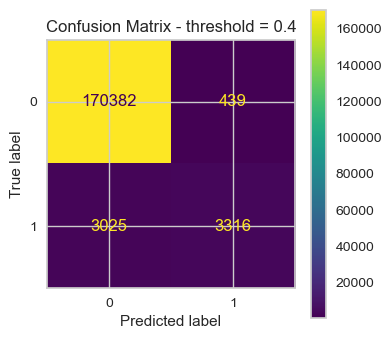

In [87]:
confusion_mat_31_b = confusion_matrix(y_valid, y_pred_b)
disp = ConfusionMatrixDisplay(confusion_mat_31_b)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - threshold = 0.4")
plt.show()

In [44]:
threshold = 0.8
y_pred_c = (model_31.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_c)

array([[170809,     12],
       [  4997,   1344]], dtype=int64)

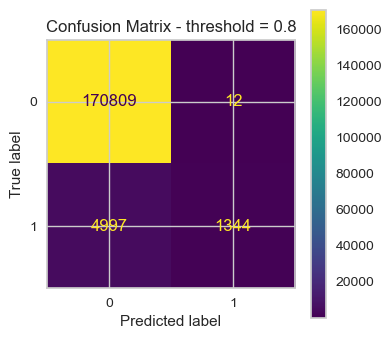

In [72]:
confusion_mat_31_c = confusion_matrix(y_valid, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_mat_31_c)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
# disp.plot(ax=ax, cmap="coolwarm")
plt.title("Confusion Matrix - threshold = 0.8")
plt.show()

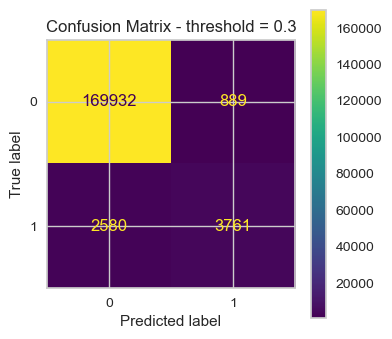

In [74]:
confusion_mat_31_cc = confusion_matrix(y_valid, y_pred_cc)
disp = ConfusionMatrixDisplay(confusion_mat_31_cc)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - threshold = 0.3")
plt.show()

In [61]:
threshold = 0.3
y_pred_cc = (model_31.predict_proba(X_valid)[:, 1] > threshold).astype('float')
confusion_matrix(y_valid, y_pred_cc)

array([[169932,    889],
       [  2580,   3761]], dtype=int64)

In [67]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_31)

,f1_score,P-R score,matthews,accuracy,recall,precision,min cut_off
TRAIN,0.997,0.995,0.997,1.000,1.000,0.995,0.300
VALID,0.684,0.494,0.683,0.980,0.593,0.809,0.300


In [63]:
roc_auc = roc_auc_score(y_valid, y_pred_cc)
roc_auc

0.7939599173767115

<div style=" background-color:#FA6775;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion. 
<li> The score with threshold =0.5 for this model is very well AUC =  92%. 
<li> Confusion matrix for threshold = 0.5:  
<li> [TP=170637, FN=200],
<li> [FP=3562,   TN=2779]     
<li> Confusion matrix for threshold = 0.2:
<li> [168582, 2239],   
<li> [2064,   4277]
<li> The score with threshold =0.3 for this model is very well AUC =  79%.    
<li> Confusion matrix for threshold = 0.3:
<li> [169932, 889],   
<li> [2580,   3761]    
<li> Confusion matrix for threshold = 0.4:
<li> [170382, 439],   
<li> [3025,   3316] 
<li> Confusion matrix for threshold = 0.8:
<li> [170809, 12],   
<li> [4997,   1344]    
    
<li> The score AUC is defenitely the best for threshold = 0.5, but if we look  at the confusion matrix we can see false negative score is only 184 
<li> Because our resorces are quite huge than we can check as many FN as we can, but for sure we want to have as few FP values as it is possible. Because of that f1/accuracy is not crucial metric in this case.  Crucial is to minimize prediction for FP, we don't want to loose frauds which will be predicted as positive transaction. 
<li> The best metric in this case will be this with threshold = 0.2 and FP=2064. Unfortunatelly FN and TN totally  =6561 so it is much more than for threshold = 0.5. In this case, compromising will be the best choice and threshold = 0.3.
</ul>
</div>

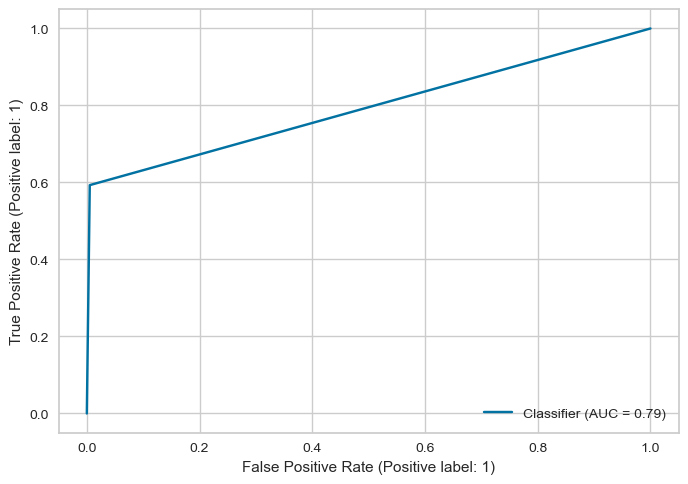

In [62]:
RocCurveDisplay.from_predictions(y_valid, y_pred_cc)

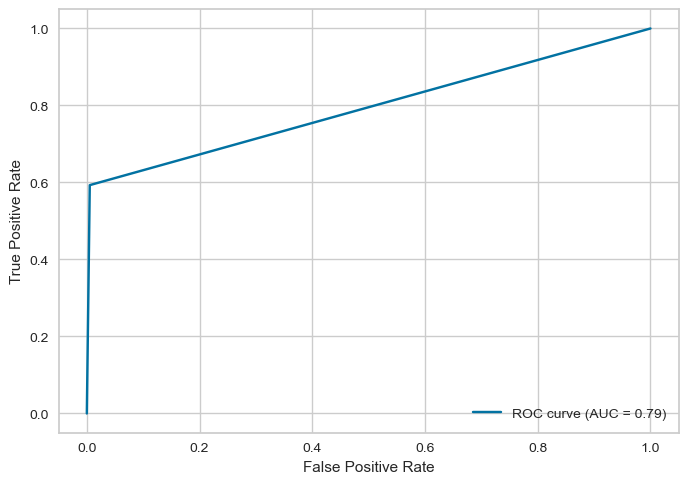

In [86]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred_cc, pos_label=1)

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()

In [76]:
roc_auc = roc_auc_score(y_valid, y_pred_cc)
roc_auc

0.7939599173767115

In [79]:
ROCAUCscore = roc_auc_score(y_valid, y_pred_cc)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.7940


### TunedThresholdClassifierCV

In [33]:
from sklearn.model_selection import TunedThresholdClassifierCV

In [34]:
classifier_tuned = TunedThresholdClassifierCV(
                                               model_31,
                                               scoring="f1").fit(X_train, y_train)
# precision,  f1,accuracy,  recall

In [ ]:
# tuned_fraud_model.fit(X_train, y_train)

In [35]:
y_pred_31_tuned = classifier_tuned.predict(X_valid)

In [37]:
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef, average_precision_score

avg_f1_train = classifier_tuned.best_score_
print(f"Average F1 on the training set: {avg_f1_train:.3f}")
print(f"Threshold: {classifier_tuned.best_threshold_: .3f}")

print(f"Original model:")
print(f"'f1_score': {round(f1_score(y_valid, y_pred_31),4)}"),
print(f"'P-R score': {round(average_precision_score(y_valid, y_pred_31),4)}"),
print(f"'matthews': {round(matthews_corrcoef(y_valid, y_pred_31),4)}"),
print(f"'accuracy': {round(accuracy_score(y_valid, y_pred_31),4)}"),
print(f"'recall': {round(recall_score(y_valid, y_pred_31),4)}"),
print(f"'precision': {round(precision_score(y_valid, y_pred_31),4)}")

print(f"Tuned model:")
print(f"'f1_score': {round(f1_score(y_valid, y_pred_31_tuned),4)}"),
print(f"'P-R score': {round(average_precision_score(y_valid, y_pred_31_tuned),4)}"),
print(f"'matthews': {round(matthews_corrcoef(y_valid, y_pred_31_tuned),4)}"),
print(f"'accuracy': {round(accuracy_score(y_valid, y_pred_31_tuned),4)}"),
print(f"'recall': {round(recall_score(y_valid, y_pred_31_tuned),4)}"),
print(f"'precision': {round(precision_score(y_valid, y_pred_31_tuned),4)}")

Average F1 on the training set: 0.663
Threshold:  0.263
Original model:
'f1_score': 0.6006
'P-R score': 0.4332
'matthews': 0.635
'accuracy': 0.9789
'recall': 0.4427
'precision': 0.9335
Tuned model:
'f1_score': 0.6847
'P-R score': 0.4888
'matthews': 0.6791
'accuracy': 0.9797
'recall': 0.6143
'precision': 0.7733


In [38]:
print(
    f"Cut-off point found at {classifier_tuned.best_threshold_:.3f}"
)

Cut-off point found at 0.263


In [39]:
print(classification_report(y_valid, classifier_tuned.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    170821
           1       0.77      0.61      0.68      6341

    accuracy                           0.98    177162
   macro avg       0.88      0.80      0.84    177162
weighted avg       0.98      0.98      0.98    177162



In [40]:
avg_f1_train = classifier_tuned.best_score_
print(f"Average F1 on the training set: {avg_f1_train:.3f}")
print(f"Threshold: {classifier_tuned.best_threshold_: .3f}")

Average F1 on the training set: 0.663
Threshold:  0.263


In [52]:
calculating_metrics(X_train, X_valid, y_train, y_valid, model_31)

,f1_score,P-R score,matthews,accuracy,recall,precision,min cut_off
TRAIN,1.000,0.999,1.000,1.000,1.000,0.999,0.429
VALID,0.665,0.454,0.653,0.976,0.674,0.657,0.214


In [54]:
calculating_metrics(X_train, X_valid, y_train, y_valid, classifier_tuned)

,f1_score,P-R score,matthews,accuracy,recall,precision,min cut_off
TRAIN,0.996,0.991,0.995,1.000,1.000,0.991,0.263
VALID,0.685,0.489,0.679,0.980,0.614,0.773,0.263


 ### <a id="V.3.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.2 XGBoostClassifier</p>

In [83]:
model_32 = XGBClassifier(random_state= 42)

In [84]:
model_train(model_32, 'XGBClassifier')

XGBClassifier - Train Score = 98.23115889089405%
XGBClassifier - Valid Score = 97.95893024463486%
XGBClassifier - Mean Squared Error = 0.02041069755365146
XGBClassifier - Mean Absolute Error = 0.02041069755365146


In [85]:
kfold_AUC(model_32)

AUC: 0.94 (0.00)


In [267]:
kfold_accuracy_RSKFold(model_32)

AUC: 0.98 (0.01)


In [86]:
y_pred_32 = model_32.predict(X_valid)

In [87]:
roc_auc_score(y_valid.values, y_pred_32)

0.7410655534295041

In [88]:
print(classification_report(y_valid,y_pred_32))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.90      0.48      0.63      6341

    accuracy                           0.98    177162
   macro avg       0.94      0.74      0.81    177162
weighted avg       0.98      0.98      0.98    177162



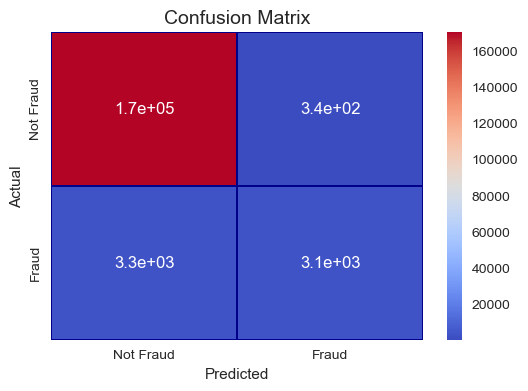

In [89]:
cm_32 = pd.crosstab(y_valid.values, y_pred_32, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_32, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

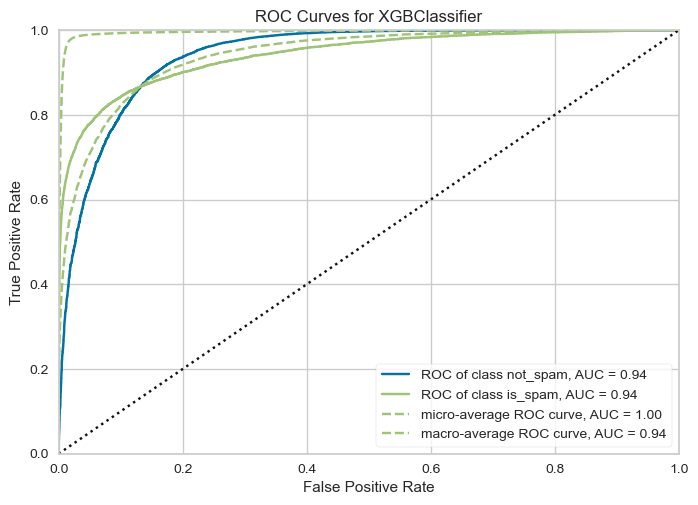

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [90]:
visualizer_32 = ROCAUC(model_32, classes=["not_spam", "is_spam"])
visualizer_32.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_32.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_32.show()     

 ### <a id="V.3.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.3 LGBMClassifier</p>

In [91]:
model_33 = LGBMClassifier(random_state= 42)

In [92]:
model_train(model_33, 'LGBMClassifier')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14322, number of negative: 399056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6278
[LightGBM] [Info] Number of data points in the train set: 413378, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034646 -> initscore=-3.327305
[LightGBM] [Info] Start training from score -3.327305
LGBMClassifier - Train Score = 97.80757563295579%
LGBMClassifier - Valid Score = 97.6908140571906%
LGBMClassifier - Mean Squared Error = 0.02309185942809406
LGBMClassifier - Mean Absolute Error = 0.02309185942809406


In [93]:
kfold_AUC(model_33)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11490, number of negative: 319212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6273
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034744 -> initscore=-3.324378
[LightGBM] [Info] Start training from score -3.324378
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11504, number of negative: 319198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

In [277]:
kfold_accuracy_RSKFold(model_33)

[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [

[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [

[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [

[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [

In [94]:
y_pred_33 = model_33.predict(X_valid)

In [95]:
roc_auc_score(y_valid, y_pred_33)

0.7044460669119299

In [96]:
print(classification_report(y_valid,y_pred_33))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.88      0.41      0.56      6341

    accuracy                           0.98    177162
   macro avg       0.93      0.70      0.77    177162
weighted avg       0.98      0.98      0.97    177162



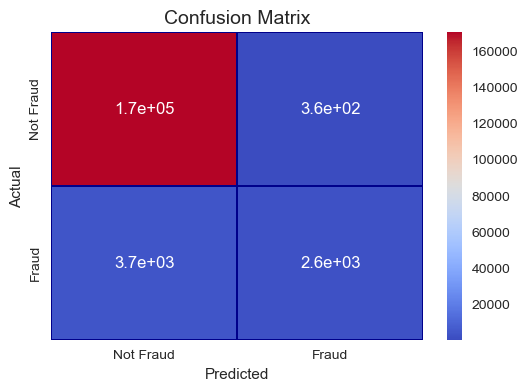

In [97]:
cm_33 = pd.crosstab(y_valid.values, y_pred_33, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_33, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

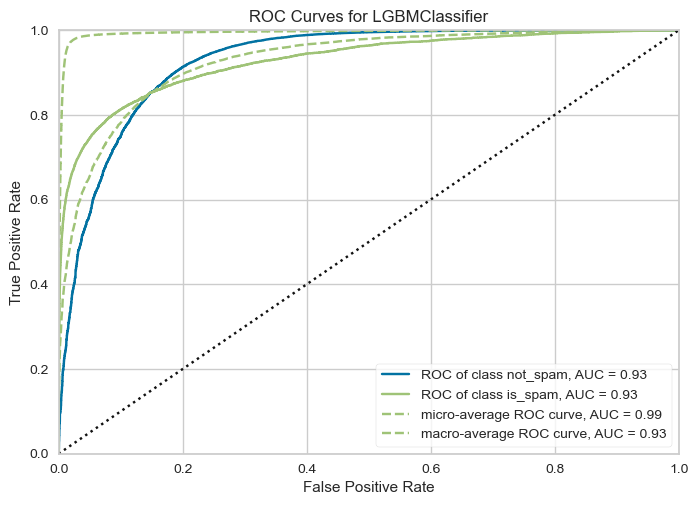

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [98]:
visualizer_33 = ROCAUC(model_33, classes=["not_spam", "is_spam"])
visualizer_33.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_33.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_33.show()  

 ### <a id="V.4"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4 SMOTE Classifiers</p>

In [57]:
def model_train_smote(model,model_name):
    model.fit(X_train_smote,y_train_smote)
    model_train_score = model.score(X_train_smote, y_train_smote)
    model_test_score = model.score(X_valid, y_valid)
    prediction = model.predict(X_valid)
    print(f"\
{model_name} - Train Score = {model_train_score *100}%\n\
{model_name} - Valid Score = {model_test_score*100}%\n\
{model_name} - Mean Squared Error = {mean_squared_error(y_valid, prediction)}\n\
{model_name} - Mean Absolute Error = {mean_absolute_error(y_valid, prediction)}")
       
def kfold_AUC_smote(model): 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=kf, scoring='roc_auc_ovo')
    print('AUC = %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))

 ### <a id="V.4.1"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4.1 RandomForestClassifier - SMOTE</p>

In [100]:
model_41 = RandomForestClassifier(n_jobs=1, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=42,
                             verbose=False)

In [101]:
model_train_smote(model_41, 'RandomForestClassifier')

RandomForestClassifier - Train Score = 99.99780707044349%
RandomForestClassifier - Valid Score = 98.6712726205394%
RandomForestClassifier - Mean Squared Error = 0.013287273794606067
RandomForestClassifier - Mean Absolute Error = 0.013287273794606067


In [102]:
kfold_AUC_smote(model_41)

AUC = 1.00 (0.00)


In [103]:
y_pred_41 = model_41.predict(X_valid)
print(classification_report(y_valid,y_pred_41))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    170821
           1       0.91      0.70      0.79      6341

    accuracy                           0.99    177162
   macro avg       0.95      0.85      0.89    177162
weighted avg       0.99      0.99      0.99    177162



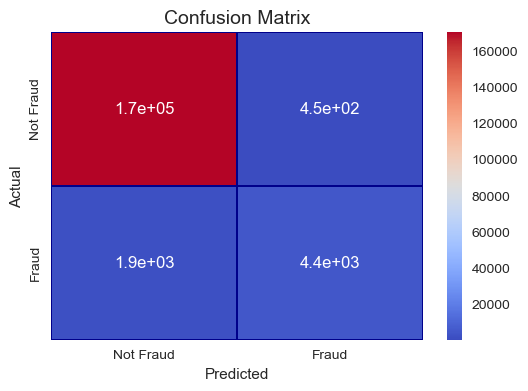

In [104]:
cm_41 = pd.crosstab(y_valid.values, y_pred_41, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_41, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [106]:
ROCAUCscore_41 = roc_auc_score(y_valid, y_pred_41)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore_41:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.8486


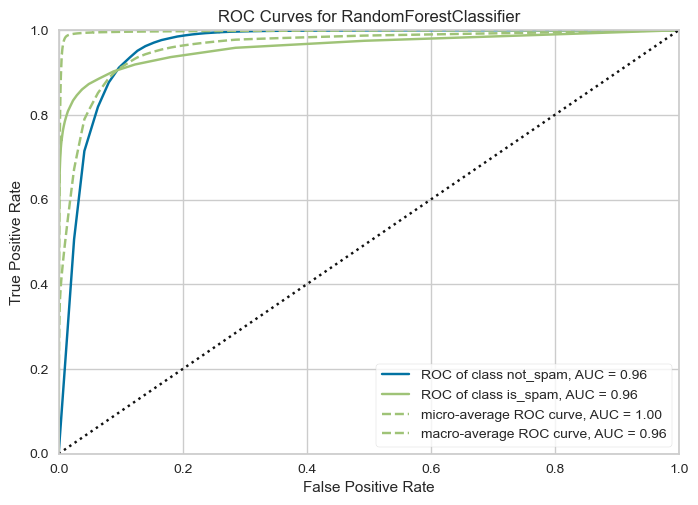

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [107]:
visualizer_41 = ROCAUC(model_41, classes=["not_spam", "is_spam"])
visualizer_41.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_41.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_41.show() 

 ### <a id="V.4.2"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4.2 Sequential API MODEL - SMOTE</p>

In [50]:
model_51 = tf.keras.models.Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)

model_51.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_51 = model_51.fit(X_train_smote, y_train_smote, 
                        epochs=50, 
                        verbose=2, 
                        batch_size=256,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/50
3563/3563 - 12s - 3ms/step - accuracy: 0.8287 - loss: 0.3817 - val_accuracy: 0.8602 - val_loss: 0.3306 - learning_rate: 0.0010
Epoch 2/50
3563/3563 - 10s - 3ms/step - accuracy: 0.8663 - loss: 0.3080 - val_accuracy: 0.8980 - val_loss: 0.2522 - learning_rate: 0.0010
Epoch 3/50
3563/3563 - 10s - 3ms/step - accuracy: 0.8783 - loss: 0.2817 - val_accuracy: 0.8903 - val_loss: 0.2692 - learning_rate: 0.0010
Epoch 4/50
3563/3563 - 10s - 3ms/step - accuracy: 0.8864 - loss: 0.2654 - val_accuracy: 0.9126 - val_loss: 0.2328 - learning_rate: 0.0010
Epoch 5/50
3563/3563 - 10s - 3ms/step - accuracy: 0.8913 - loss: 0.2543 - val_accuracy: 0.8978 - val_loss: 0.2469 - learning_rate: 0.0010
Epoch 6/50
3563/3563 - 10s - 3ms/step - accuracy: 0.8962 - loss: 0.2450 - val_accuracy: 0.8903 - val_loss: 0.2399 - learning_rate: 0.0010
Epoch 7/50
3563/3563 - 10s - 3ms/step - accuracy: 0.8993 - loss: 0.2379 - val_accuracy: 0.9105 - val_loss: 0.2233 - learning_rate: 0.0010
Epoch 8/50
3563/3563 - 10s - 3ms/s

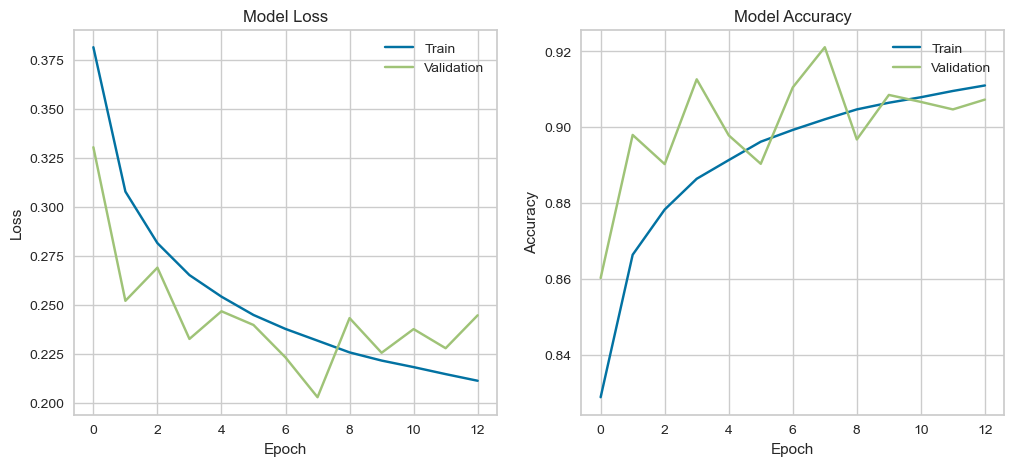

In [51]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_51.history['loss'])
plt.plot(history_51.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_51.history['accuracy'])
plt.plot(history_51.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [52]:
X_test_pred_51 = model_51.predict(X_valid)
mse_51 = np.mean(np.power(X_valid - X_test_pred_51, 2), axis=1)
df_error_51 = pd.DataFrame({'isFraud': y_valid, 'reconstruction_error': mse_51})

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 3s 708us/step


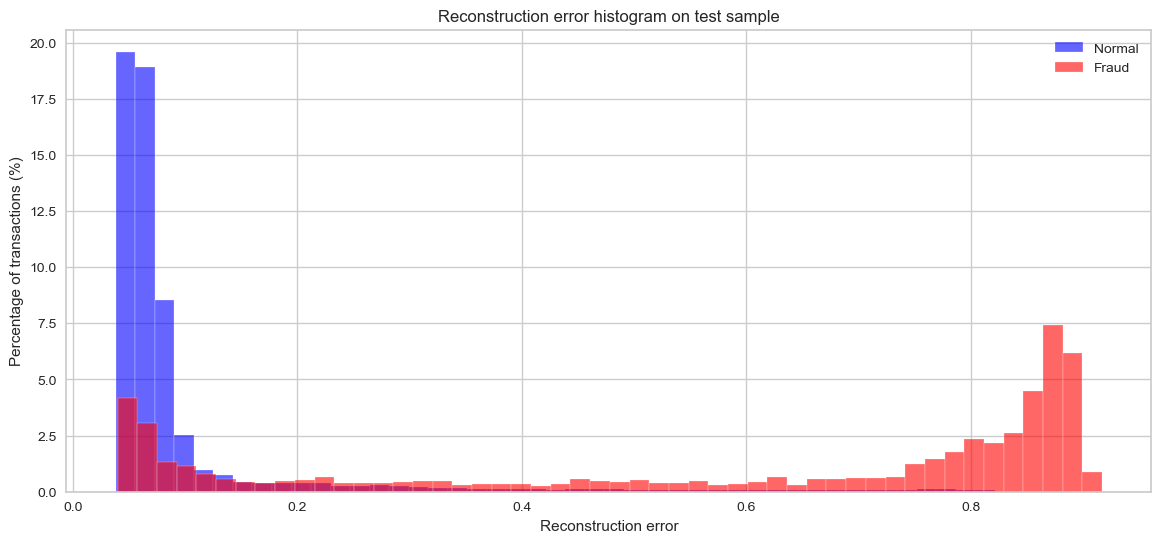

In [53]:
hist_norm_fraud(df_error_51[df_error_51['isFraud'] == 0]['reconstruction_error'], 
                df_error_51[df_error_51['isFraud'] == 1]['reconstruction_error'],
                bins=50,
                title="Reconstruction error histogram on test sample",
                xlabel="Reconstruction error",
                ylabel="Percentage of transactions (%)")

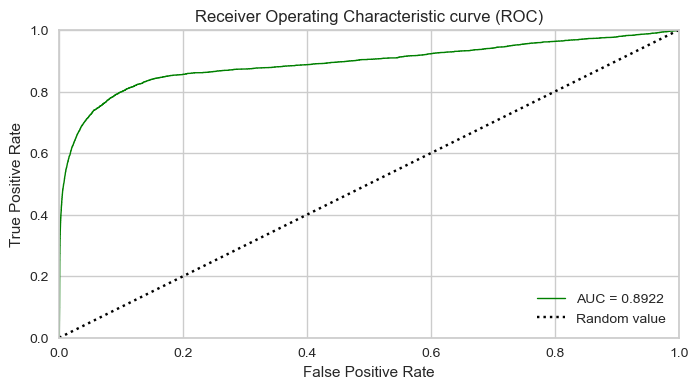

In [55]:
fpr, tpr, thresholds = roc_curve(df_error_51['isFraud'], 
                                 df_error_51['reconstruction_error'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='green', 
         label='AUC = %0.4f'% roc_auc, linewidth=1)
plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.legend(loc='lower right', frameon=False)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

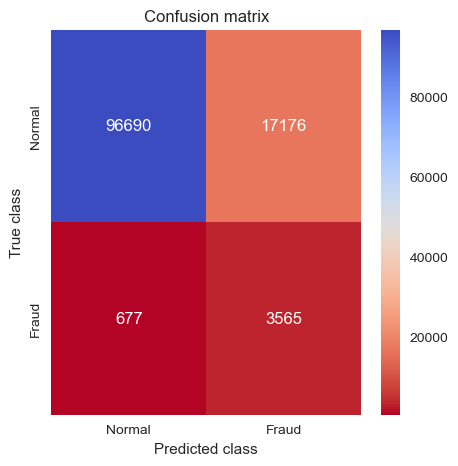

In [54]:
from sklearn.metrics import confusion_matrix
treshold=0.1
y_pred = [1 if e > treshold else
          0 for e in df_error_51['reconstruction_error'].values]
conf_matrix = confusion_matrix(df_error_51['isFraud'], y_pred)
 
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'], 
            yticklabels=['Normal','Fraud'], annot=True, 
            fmt="d", cmap='coolwarm_r');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

 ### <a id="V.4.3"><p style="background-color: #002C54;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4.3 XGBoostClassifier - SMOTE</p>

In [60]:
model_53 = XGBClassifier(random_state= 42)

In [61]:
model_train_smote(model_53, 'XGBClassifier-SMOTE')

XGBClassifier-SMOTE - Train Score = 97.9173748001693%
XGBClassifier-SMOTE - Valid Score = 97.35326988857655%
XGBClassifier-SMOTE - Mean Squared Error = 0.02646730111423443
XGBClassifier-SMOTE - Mean Absolute Error = 0.02646730111423443


In [63]:
kfold_AUC_smote(model_53)

AUC = nan (nan)


In [69]:
y_pred_53 = model_53.predict(X_valid)
print(classification_report(y_valid,y_pred_53))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113866
           1       0.67      0.53      0.59      4242

    accuracy                           0.97    118108
   macro avg       0.82      0.76      0.79    118108
weighted avg       0.97      0.97      0.97    118108



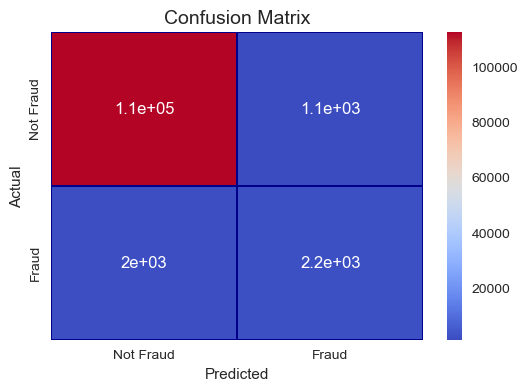

In [74]:
cm_53 = pd.crosstab(y_valid.values, y_pred_53, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_53, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

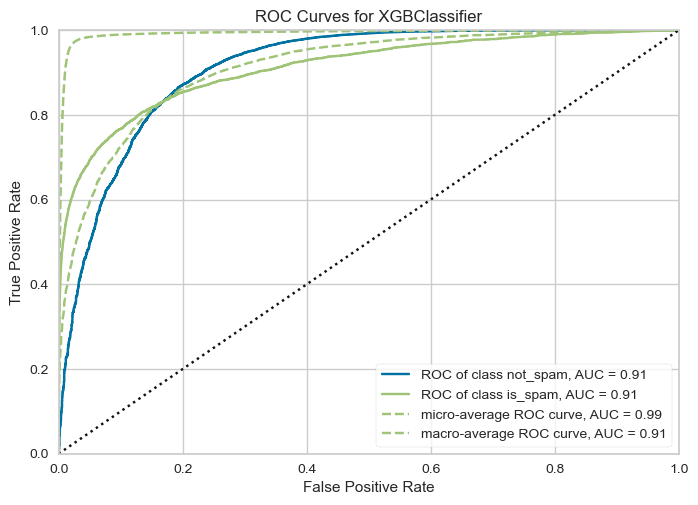

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
visualizer_53 = ROCAUC(model_53, classes=["not_spam", "is_spam"])
visualizer_53.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_53.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_53.show() 

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="VI"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#002C54;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> CONCLUSION</div>

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It was investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. 

Models was split into 4 parts. 

* V.1 First  model it is a  Sequencial API Model. In this section was  develop the neural network based on  sequentional model. The Sequential model is a linear stack of layers and is used when the data flows sequentially from one layer to another.
                                                                   AUC = 74%
* V.2 Sequencial API Model, but dens of neurons is set up higher on 256. 
                                                                   AUC = 76%

* V.3 Series of traditional classification models: 
     * V.3.1 RandomForestClassifier:                        AUC = 92%
     * V.3.2 XGBoostClassifier:                             AUC = 94%
     * V.3.3 LGBMClassifier:                                AUC = 93%

* V.4 Model based on oversampled data by SMOTE algorithm.
    * V.4.1 RandomForestClassifier - SMOTE **<mark style="background-color:#FA6775;color:white;border-radius:5px;opacity:1.0">AUC = 96%</mark>**
    * V.4.2 Sequential API MODEL - SMOTE                           AUC = 89%
    * V.4.3 XGBoostClassifier - SMOTE                              AUC = 91%

We started with Sequencial API Model for which we obtained an AUC score of 0.74% and 76% for a bit upgraded one.
We followed with an series of traditional classification models for which scores was aound 93%.

At the end was tested models based on oversampled data by SMOTE algorithm. For RandomForestClassifier we obtained an AUC scode of 0.96% which is the  best result from all tests.